# **Projeto Final 2 - Melanoma classification**

Disciplina: INF-0619 – Projeto Final
Grupo: The Outliers

Alunos:
   
 Paula Sampaio Meirelles
 
 Raphael Mendes Motta  
 
 Renata Rosa Biaggi Barreto
 
 Tailís Tavera Ferreira


In [ ]:
pip install pillow

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn import metrics

from __future__ import print_function

from tqdm import tqdm

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout
from keras import optimizers, regularizers, initializers
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (15,15) 
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
from keras.utils import np_utils


from keras.utils import plot_model
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Carregando arquivos do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Confirmando arquivos existentes na pasta do Google Drive
import os
os.chdir("/content/drive/Shared drives/Melanoma")
!ls

Amostras						test.csv
Exemplo_Para_Carregar_Lista_Imagem_Desse_Projeto.ipynb	TodasImagens
Graficos						train.csv
Melanoma_Link						train.gsheet
sample_submission.csv


In [ ]:
# Confirmando as imagens existentes na pasta do Google Drive
import os
os.chdir("/content/drive/Shared drives/Melanoma/TodasImagens/jpeg/train/")
!ls

A saída de streaming foi truncada nas últimas 5000 linhas.
 ISIC_1912184.jpg	 ISIC_5218773.jpg	 ISIC_8516631.jpg
 ISIC_1912326.jpg	 ISIC_5219334.jpg	 ISIC_8516659.jpg
 ISIC_1912518.jpg	 ISIC_5219569.jpg	 ISIC_8516922.jpg
 ISIC_1912578.jpg	 ISIC_5219705.jpg	 ISIC_8517305.jpg
 ISIC_1912589.jpg	 ISIC_5219742.jpg	 ISIC_8517492.jpg
 ISIC_1912677.jpg	 ISIC_5220254.jpg	 ISIC_8518406.jpg
 ISIC_1912757.jpg	 ISIC_5220578.jpg	 ISIC_8519222.jpg
 ISIC_1912902.jpg	 ISIC_5220580.jpg	 ISIC_8519402.jpg
 ISIC_1914419.jpg	 ISIC_5220698.jpg	 ISIC_8519725.jpg
 ISIC_1915434.jpg	 ISIC_5220911.jpg	 ISIC_8519890.jpg
 ISIC_1915549.jpg	 ISIC_5221189.jpg	 ISIC_8519931.jpg
 ISIC_1915791.jpg	 ISIC_5221354.jpg	 ISIC_8520545.jpg
 ISIC_1915890.jpg	 ISIC_5221422.jpg	 ISIC_8521162.jpg
 ISIC_1915989.jpg	 ISIC_5221619.jpg	 ISIC_8521337.jpg
 ISIC_1916757.jpg	 ISIC_5221636.jpg	 ISIC_8521610.jpg
 ISIC_1917554.jpg	 ISIC_5221917.jpg	 ISIC_8521849.jpg
 ISIC_1917581.jpg	 ISIC_5222093.jpg	 ISIC_8521856.jpg
 ISIC_1917856.jpg	 ISIC

# **Análise exploratória inicial**

Antes de analisar as imagens propriamente, primeiro, vamos verificar os dados que foram fornecidos junto com as imagens das lesões que levam em conta alguns fatores como gênero do paciente, idade e local da lesão. São dois arquivos csv (train e test) contendo essas informações, além das imagens das lesões.

Dividimos o arquivo 'train' em 'maligno' e 'benigno' de acordo com o valor da feature 'target'. Se 'target' é igual a 1, então a lesão é maligna, caso contrário é benigna. 

In [ ]:
test = pd.read_csv('/content/drive/Shared drives/Melanoma/test.csv')   
train = pd.read_csv('/content/drive/Shared drives/Melanoma/train.csv')
train_am = pd.read_csv('/content/drive/Shared drives/Melanoma/train.csv')

In [ ]:
train.head(50)

image_name  patient_id     sex  ...  diagnosis benign_malignant target
0   ISIC_2637011  IP_7279968    male  ...    unknown           benign      0
1   ISIC_0015719  IP_3075186  female  ...    unknown           benign      0
2   ISIC_0052212  IP_2842074  female  ...      nevus           benign      0
3   ISIC_0068279  IP_6890425  female  ...    unknown           benign      0
4   ISIC_0074268  IP_8723313  female  ...    unknown           benign      0
5   ISIC_0074311  IP_2950485  female  ...    unknown           benign      0
6   ISIC_0074542  IP_4698288    male  ...    unknown           benign      0
7   ISIC_0075663  IP_6017204  female  ...    unknown           benign      0
8   ISIC_0075914  IP_7622888    male  ...    unknown           benign      0
9   ISIC_0076262  IP_5075533  female  ...    unknown           benign      0
10  ISIC_0076545  IP_9802602    male  ...    unknown           benign      0
11  ISIC_0076742  IP_2318163    male  ...    unknown           benign      0
12  ISIC_0076995  IP_2235340  female  ...      nevus           benign      0
13  ISIC_0077472  IP_3691360  female  ...    unknown           benign      0
14  ISIC_0077735  IP_1109756    male  ...    unknown           benign      0
15  ISIC_0078703  IP_7279968    male  ...    unknown           benign      0
16  ISIC_0078712  IP_2189124    male  ...    unknown           benign      0
17  ISIC_0079038  IP_5295861    male  ...    unknown           benign      0
18  ISIC_0080512  IP_1870306    male  ...    unknown           benign      0
19  ISIC_0080752  IP_2613684    male  ...    unknown           benign      0
20  ISIC_0080817  IP_7318404    male  ...    unknown           benign      0
21  ISIC_0081956  IP_2010919  female  ...    unknown           benign      0
22  ISIC_0082348  IP_7684360    male  ...    unknown           benign      0
23  ISIC_0082543  IP_9463965  female  ...    unknown           benign      0
24  ISIC_0082934  IP_6572129    male  ...    unknown           benign      0
25  ISIC_0083035  IP_5805281    male  ...    unknown           benign      0
26  ISIC_0084086  IP_4023055    male  ...      nevus           benign      0
27  ISIC_0084270  IP_2961528    male  ...      nevus           benign      0
28  ISIC_0084395  IP_0175539  female  ...      nevus           benign      0
29  ISIC_0085172  IP_1705144  female  ...    unknown           benign      0
30  ISIC_0085718  IP_1264754  female  ...    unknown           benign      0
31  ISIC_0085902  IP_3658607    male  ...    unknown           benign      0
32  ISIC_0086349  IP_2825529  female  ...      nevus           benign      0
33  ISIC_0086462  IP_3200260  female  ...    unknown           benign      0
34  ISIC_0086632  IP_2114130    male  ...    unknown           benign      0
35  ISIC_0086709  IP_4109313    male  ...    unknown           benign      0
36  ISIC_0087290  IP_4050705  female  ...    unknown           benign      0
37  ISIC_0087297  IP_5389392    male  ...    unknown           benign      0
38  ISIC_0088137  IP_5205991     NaN  ...    unknown           benign      0
39  ISIC_0088489  IP_9147454  female  ...    unknown           benign      0
40  ISIC_0089401  IP_7948039  female  ...    unknown           benign      0
41  ISIC_0089569  IP_3933152  female  ...      nevus           benign      0
42  ISIC_0089738  IP_3076695  female  ...      nevus           benign      0
43  ISIC_0090279  IP_3397861  female  ...    unknown           benign      0
44  ISIC_0091016  IP_4042098    male  ...      nevus           benign      0
45  ISIC_0091559  IP_2153088  female  ...    unknown           benign      0
46  ISIC_0091996  IP_1273286    male  ...      nevus           benign      0
47  ISIC_0092726  IP_7279968    male  ...    unknown           benign      0
48  ISIC_0092870  IP_8233849    male  ...    unknown           benign      0
49  ISIC_0094701  IP_4042098    male  ...      nevus           benign      0

[50 rows x 8 columns]

In [ ]:
train.count()

image_name                       33126
patient_id                       33126
sex                              33061
age_approx                       33058
anatom_site_general_challenge    32599
diagnosis                        33126
benign_malignant                 33126
target                           33126
dtype: int64

In [ ]:
test.count()

image_name                       10982
patient_id                       10982
sex                              10982
age_approx                       10982
anatom_site_general_challenge    10631
dtype: int64

**Eliminando imagens duplicadas nos conjuntos de treino e teste se existirem**

A ideia é verificar se há mais de uma imagem de uma mesma região do corpo do mesmo paciente. Se existir, é necessário excluir antes da análise porque a hipótese é usarmos a maior variedade de imagens possíveis.

Eliminando as imagens duplicadas dos pacientes no conjunto de treino, caso existam.

In [ ]:
train = train.drop_duplicates(subset=['patient_id','anatom_site_general_challenge'], keep='first')
train.count()

image_name                       6360
patient_id                       6360
sex                              6353
age_approx                       6351
anatom_site_general_challenge    6140
diagnosis                        6360
benign_malignant                 6360
target                           6360
dtype: int64

Fazendo o mesmo para o conjunto de teste

In [ ]:
test = test.drop_duplicates(subset=['patient_id','anatom_site_general_challenge'], keep='first')

In [ ]:
test.count()

image_name                       2070
patient_id                       2070
sex                              2070
age_approx                       2070
anatom_site_general_challenge    2009
dtype: int64

# **Estatísticas descritivas**

In [ ]:
regiao = train.groupby('anatom_site_general_challenge')['patient_id'].count()
regiao

anatom_site_general_challenge
head/neck           841
lower extremity    1639
oral/genital         78
palms/soles         197
torso              1955
upper extremity    1430
Name: patient_id, dtype: int64

In [ ]:
total_regiao = 1430 + 1955 + 197 + 78 + 1639 + 841
total_regiao

6140

In [ ]:
def percentual(num):
  per = num/6140
  return per

In [ ]:
regiao_df = pd.DataFrame({'Local':regiao.index, 'Ocorrências':regiao.values}) #Transforma a série acima em dataframe
regiao_df

Local  Ocorrências
0        head/neck          841
1  lower extremity         1639
2     oral/genital           78
3      palms/soles          197
4            torso         1955
5  upper extremity         1430

In [ ]:
regiao_df['% do total'] = regiao_df['Ocorrências'].apply(percentual)
regiao_df

Local  Ocorrências  % do total
0        head/neck          841    0.136971
1  lower extremity         1639    0.266938
2     oral/genital           78    0.012704
3      palms/soles          197    0.032085
4            torso         1955    0.318404
5  upper extremity         1430    0.232899

In [ ]:
test.groupby('anatom_site_general_challenge')['patient_id'].count()

anatom_site_general_challenge
head/neck          268
lower extremity    535
oral/genital        23
palms/soles         48
torso              659
upper extremity    476
Name: patient_id, dtype: int64

# **Maligno**

In [ ]:
maligno = train[(train['target'] == 1)]

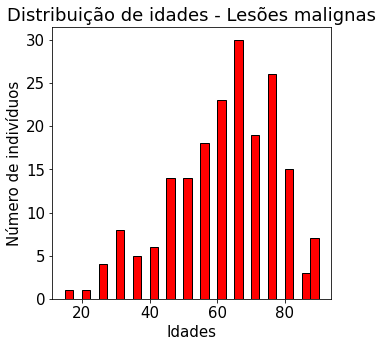

In [ ]:
plt.rcParams['figure.figsize']=(5,5)
plt.rcParams['font.size'] = 15.0
maligno['age_approx'].plot.hist(bins=30,color='r',edgecolor='k')
plt.xlabel('Idades')
plt.ylabel('Número de indivíduos')
plt.title('Distribuição de idades - Lesões malignas')
plt.show()


**Modelo Stacked Column Chart - estudos por ferramenta PowerBI**

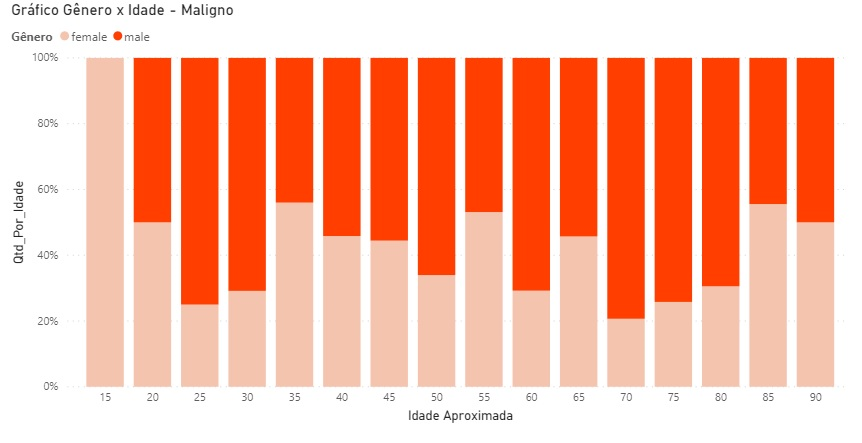

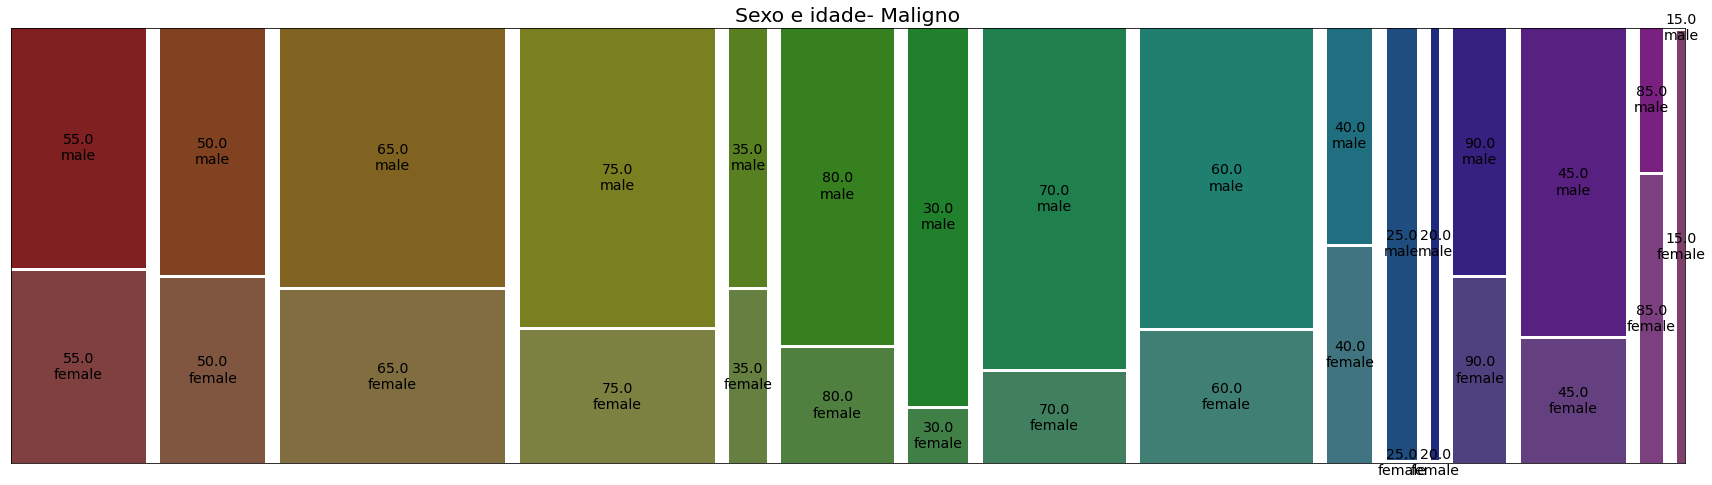

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 17.0
plt.rcParams['figure.figsize']=(30,8)
mosaic(maligno, ['age_approx','sex'], gap=0.01, title='Sexo e idade- Maligno', axes_label=False);

# **Análise das regiões onde aparecem as lesões malignas** 

In [ ]:
maligno['anatom_site_general_challenge'].unique()

array(['upper extremity', 'torso', 'lower extremity', 'head/neck',
       'palms/soles', nan, 'oral/genital'], dtype=object)

In [ ]:
maligno_local = maligno.groupby('anatom_site_general_challenge')['patient_id'].count()
maligno_local

anatom_site_general_challenge
head/neck          42
lower extremity    37
oral/genital        2
palms/soles         3
torso              58
upper extremity    48
Name: patient_id, dtype: int64

In [ ]:
total = 42 + 37 + 2 + 3 + 58 + 48
total

190

In [ ]:
maligno_local_df = pd.DataFrame({'Local':maligno_local.index, 'Ocorrências':maligno_local.values}) #Transforma a série acima em dataframe
maligno_local_df

Local  Ocorrências
0        head/neck           42
1  lower extremity           37
2     oral/genital            2
3      palms/soles            3
4            torso           58
5  upper extremity           48

In [ ]:
def percentual(num):
  per = num/190
  return per

Percebemos que a maior incidência de lesão maligna é no torso (45%) ou tronco seguido das extremidades do corpo (21% para membros superiores e 19% para membros inferiores).

As regiões menos afetadas são oral/genital e palmas das mãos e pés. A explicação disso está na baixa exposição aos raios solares se comparado aos membros e tronco. 

In [ ]:
maligno_local_df['% do total'] = maligno_local_df['Ocorrências'].apply(percentual)
maligno_local_df

Local  Ocorrências  % do total
0        head/neck           42    0.221053
1  lower extremity           37    0.194737
2     oral/genital            2    0.010526
3      palms/soles            3    0.015789
4            torso           58    0.305263
5  upper extremity           48    0.252632

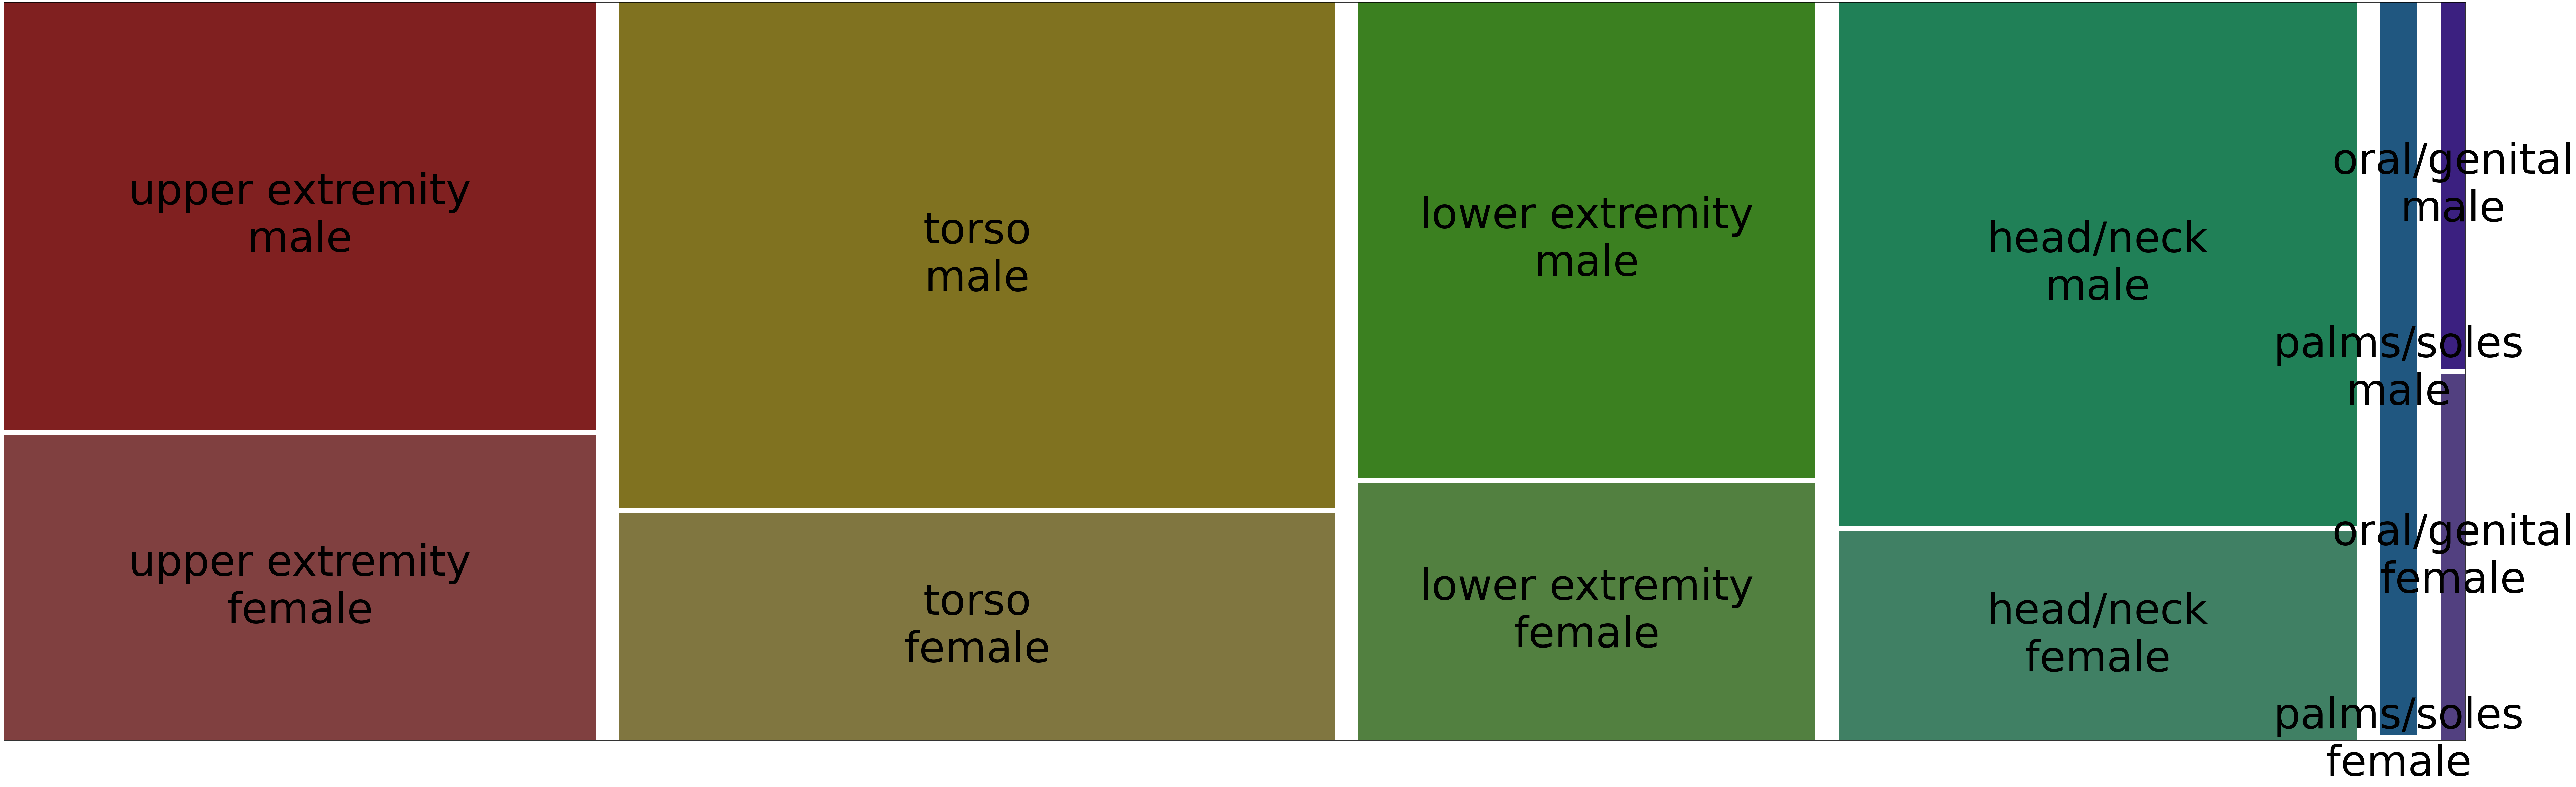

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 150.0
plt.rcParams['figure.figsize']=(130,40)
#mosaic(maligno, ['anatom_site_general_challenge', 'sex'], gap=0.01, title='Sexo e local da lesão - Maligno', axes_label=False);
mosaic(maligno, ['anatom_site_general_challenge', 'sex'], gap=0.01, axes_label=False);

**Segundo modelo de TreeMap- estudos por ferramenta PowerBI**

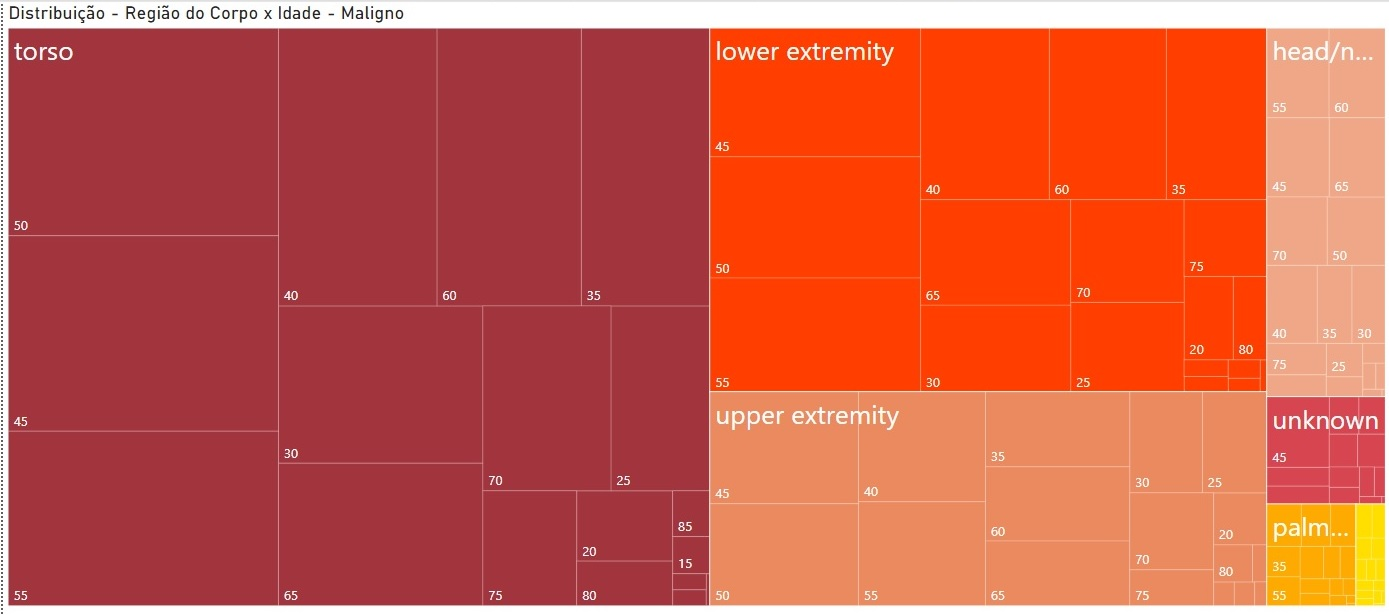

# **Benigno**

In [ ]:
benigno = train[(train['target'] == 0)]

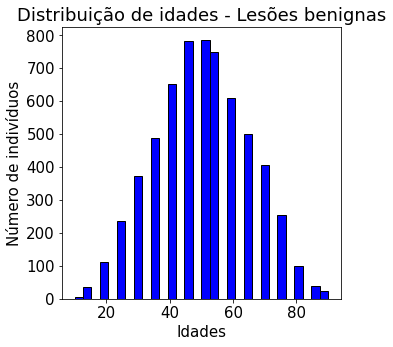

In [ ]:
plt.rcParams['figure.figsize']=(5,5)
plt.rcParams['font.size'] = 15.0
benigno['age_approx'].plot.hist(bins=30,color='b',edgecolor='k')
plt.xlabel('Idades')
plt.ylabel('Número de indivíduos')
plt.title('Distribuição de idades - Lesões benignas')
plt.show()

**Modelo Stacked Column Chart - estudos por ferramenta PowerBI**

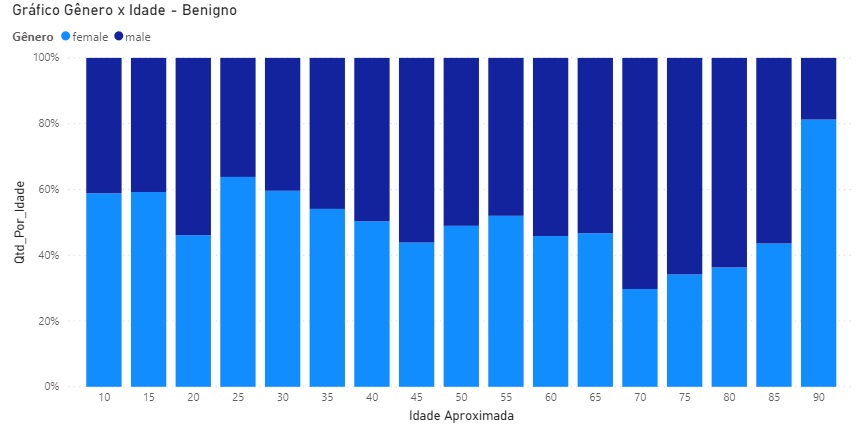

In [ ]:
benigno_local = benigno.groupby('anatom_site_general_challenge')['target'].count()
benigno_local

anatom_site_general_challenge
head/neck           799
lower extremity    1602
oral/genital         76
palms/soles         194
torso              1897
upper extremity    1382
Name: target, dtype: int64

In [ ]:
total2 = 799 + 1602 + 76 + 194 + 1897 + 1382
total2

5950

In [ ]:
def percentual2(num):
  per = num/5950
  return per

In [ ]:
benigno_local_df = pd.DataFrame({'Local':benigno_local.index, 'Ocorrências':benigno_local.values}) #Transforma a série acima em dataframe
benigno_local_df

Local  Ocorrências
0        head/neck          799
1  lower extremity         1602
2     oral/genital           76
3      palms/soles          194
4            torso         1897
5  upper extremity         1382

In [ ]:
benigno_local_df['% do total'] = benigno_local_df['Ocorrências'].apply(percentual2)
benigno_local_df

Local  Ocorrências  % do total
0        head/neck          799    0.134286
1  lower extremity         1602    0.269244
2     oral/genital           76    0.012773
3      palms/soles          194    0.032605
4            torso         1897    0.318824
5  upper extremity         1382    0.232269

**Modelo de TreeMap- estudos por ferramenta PowerBI**

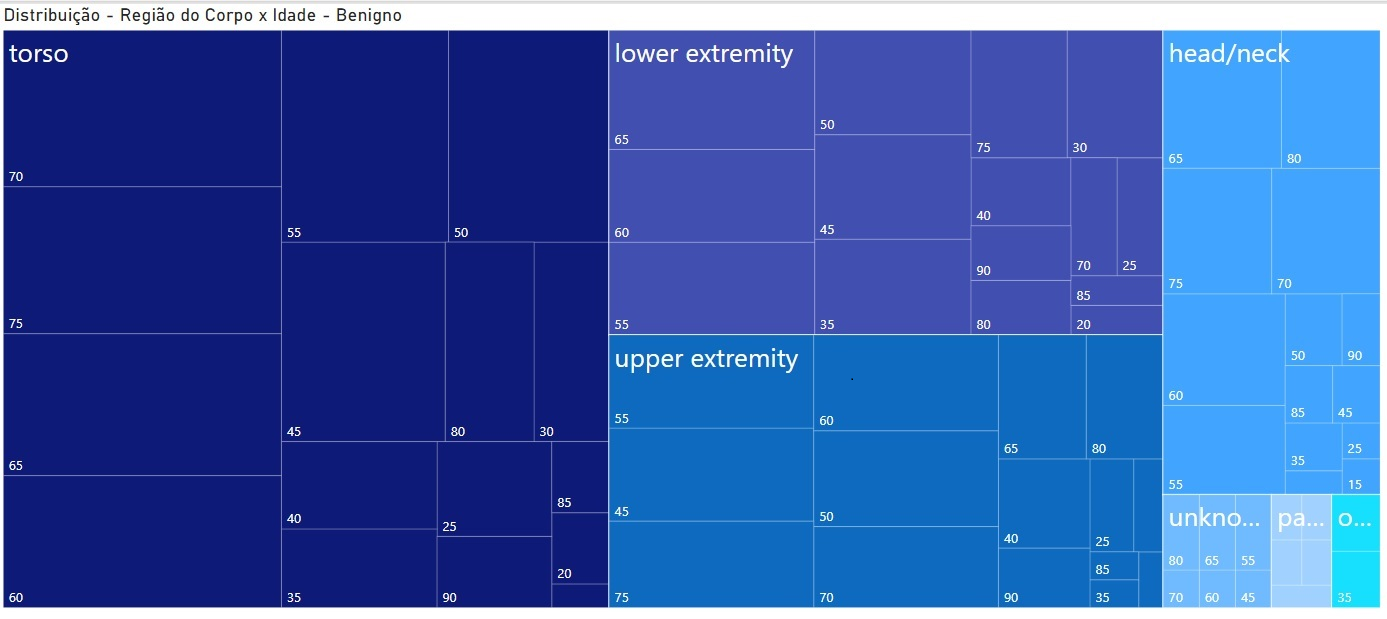

#  **Amostragem**

Usando a preparação de dados, temos um total de 179 imagens de lesões malignas. Com esse número em mente, iremos fazer uma amostragem de 179 imagens dentro do conjunto de lesões benignas.

In [ ]:
from sklearn.model_selection import train_test_split

treino=train_am.copy()
# Retirando os valores nulos
treino=treino.dropna()  
# Criando indice de paciente + local da lesao ( um mesmo paciente pode ter lesao em locais diferentes)
treino.insert(0, 'paciente_anatomia',treino['patient_id'].astype(str)+ "_" + treino['anatom_site_general_challenge'].astype(str) )
# Ordenando pacientes pela maior idade
treino.sort_values(by=['age_approx'], inplace=True, ascending=False)
# Retirando pacientes com registros duplicados ( paciente + local da lesao), mantendo apenas os registros de maior idade desse paciente
treino=treino.drop_duplicates(subset='paciente_anatomia', keep='first')
#treino.query('patient_id == "IP_0036322"') #--- exemplo de paciente que mudou de idade
# Separando as amostras de malignos
amostra_malignos= treino[treino['target']==1] #--- total de 179 
# Separando as amostras de benignos
treino_benignos= treino[treino['target']==0] #--- total de 5952
# Criando indice "Chave" ( imagem, sexo, idade, anatomia, benigno/maligno e target) para localizacao de cada registro na base total de treino
treino.insert(0, 'comb_features',treino['image_name'].astype(str)+ "_" + treino['sex'].astype(str)+ "_" + treino['age_approx'].astype(str) + "_" + treino['anatom_site_general_challenge'].astype(str)  + "_" + treino['benign_malignant'].astype(str)  + "_" + treino['target'].astype(str)  ) # criando um indice com as features a serem analisadas
# Criando indice "Chave" ( imagem, sexo, idade, anatomia, benigno/maligno e target) para localizacao de cada registro na base de treinos apenas dos benignos
treino_benignos.insert(0, 'comb_features',treino_benignos['image_name'].astype(str)+ "_" + treino_benignos['sex'].astype(str)+ "_" + treino_benignos['age_approx'].astype(str) + "_" + treino_benignos['anatom_site_general_challenge'].astype(str)  + "_" + treino_benignos['benign_malignant'].astype(str)  + "_" + treino_benignos['target'].astype(str)  ) # criando um indice com as features a serem analisadas

# Retirando a amostra da base de benignos em quantidade aproximada dos malignos para balanceamento
X=treino_benignos['comb_features']
y=treino_benignos['target']



####################################################################################
# Gerando Amostra de Lesoes Benignas
# Gerando uma amostra  de lesoes benignas estratificada proporcional considerando  imagem, sexo, idade, anatomia, benigno/maligno e target
# E quantidade equivalente das lesoes malignas (179)
trainX, amostraX, trainy, amostray = train_test_split(X, y, test_size=0.03, random_state=40, stratify=y)
# summarize
train_0, train_1 = len(trainy[trainy==0]), len(trainy[trainy==1])
amostra_0, amostra_1 = len(amostray[amostray==0]), len(amostray[amostray==1])
print('>Train: 0=%d, 1=%d, Amostra: 0=%d, 1=%d' % (train_0, train_1, amostra_0, amostra_1))

amostra= amostraX.to_frame()

amostra = pd.merge(amostra, treino, how='inner', on=['comb_features'])

amostra_benignos= pd.DataFrame(amostra, columns= ['image_name',	'patient_id',	'sex',	'age_approx',	'anatom_site_general_challenge',	'diagnosis',	'benign_malignant',	'target'])

print('')
print('amostra_benignos - Qtd. distintas de targets       : '  + str(len(amostra_benignos.target.values)))                             # Qtd total de amostragem
print('amostra_benignos - Qtd. distintas de genero        : '  + str(len(set(amostra_benignos.sex.values))))                           # Qtd distinta de genero --->  2 = female/male
print('amostra_benignos - Qtd. distintas de idade         : '  + str(len(set(amostra_benignos.age_approx.values))))                    # Qtd distinta de idade  --->  15
print('amostra_benignos - Qtd. distintas de local anatomia: '  + str(len(set(amostra_benignos.anatom_site_general_challenge.values)))) # Qtd distinta de localizacao da lesao --> 6 head/neck, upper extremity, lower extremity, torso, palms/soles, oral/genital
print('amostra_benignos - Qtd. distintas de Tipo Lesao    : '  + str(len(set(amostra_benignos.benign_malignant.values))))              # Qtd distinta de classificação ---> 2 benign/malignant
print('amostra_benignos - Qtd. distintas de targets       : '  + str(len(set(amostra_benignos.target.values))))                        # Qtd distinta de target  ---> 2 (0/1)
####################################################################################
# Explorando a quantidade da amostra das lesoes malignas

amostra_malignos= pd.DataFrame(amostra_malignos, columns= ['image_name',	'patient_id',	'sex',	'age_approx',	'anatom_site_general_challenge',	'diagnosis',	'benign_malignant',	'target'])
print('')
print('amostra_malignos - Qtd. distintas de targets       : '  + str(len(amostra_malignos.target.values)))                             # Qtd total de amostragem
print('amostra_malignos - Qtd. distintas de genero        : '  + str(len(set(amostra_malignos.sex.values))))                           # Qtd distinta de genero --->  2 = female/male
print('amostra_malignos - Qtd. distintas de idade         : '  + str(len(set(amostra_malignos.age_approx.values))))                    # Qtd distinta de idade  --->  15
print('amostra_malignos - Qtd. distintas de local anatomia: '  + str(len(set(amostra_malignos.anatom_site_general_challenge.values)))) # Qtd distinta de localizacao da lesao --> 6 head/neck, upper extremity, lower extremity, torso, palms/soles, oral/genital
print('amostra_malignos - Qtd. distintas de Tipo Lesao    : '  + str(len(set(amostra_malignos.benign_malignant.values))))              # Qtd distinta de classificação ---> 2 benign/malignant
print('amostra_malignos - Qtd. distintas de targets       : '  + str(len(set(amostra_malignos.target.values))))                        # Qtd distinta de target  ---> 2 (0/1)))   
####################################################################################
# Unificando as amostras de lesoes benignas e malignas em um unico data frame

amostras_unificadas = pd.concat([amostra_benignos, amostra_malignos])

# Explorando a quantidade da amostra das lesoes malignas
print('')
print('amostras_unificadas - Qtd. distintas de targets       : '  + str(len(amostras_unificadas.target.values)))                             # Qtd total de amostragem
print('amostras_unificadas - Qtd. distintas de genero        : '  + str(len(set(amostras_unificadas.sex.values))))                           # Qtd distinta de genero --->  2 = female/male
print('amostras_unificadas - Qtd. distintas de idade         : '  + str(len(set(amostras_unificadas.age_approx.values))))                    # Qtd distinta de idade  --->  15
print('amostras_unificadas - Qtd. distintas de local anatomia: '  + str(len(set(amostras_unificadas.anatom_site_general_challenge.values)))) # Qtd distinta de localizacao da lesao --> 6 head/neck, upper extremity, lower extremity, torso, palms/soles, oral/genital
print('amostras_unificadas - Qtd. distintas de Tipo Lesao    : '  + str(len(set(amostras_unificadas.benign_malignant.values))))              # Qtd distinta de classificação ---> 2 benign/malignant
print('amostras_unificadas - Qtd. distintas de targets       : '  + str(len(set(amostras_unificadas.target.values))))        


>Train: 0=5773, 1=0, Amostra: 0=179, 1=0

amostra_benignos - Qtd. distintas de targets       : 179
amostra_benignos - Qtd. distintas de genero        : 2
amostra_benignos - Qtd. distintas de idade         : 15
amostra_benignos - Qtd. distintas de local anatomia: 6
amostra_benignos - Qtd. distintas de Tipo Lesao    : 1
amostra_benignos - Qtd. distintas de targets       : 1

amostra_malignos - Qtd. distintas de targets       : 179
amostra_malignos - Qtd. distintas de genero        : 2
amostra_malignos - Qtd. distintas de idade         : 14
amostra_malignos - Qtd. distintas de local anatomia: 6
amostra_malignos - Qtd. distintas de Tipo Lesao    : 1
amostra_malignos - Qtd. distintas de targets       : 1

amostras_unificadas - Qtd. distintas de targets       : 358
amostras_unificadas - Qtd. distintas de genero        : 2
amostras_unificadas - Qtd. distintas de idade         : 16
amostras_unificadas - Qtd. distintas de local anatomia: 6
amostras_unificadas - Qtd. distintas de Tipo Lesao    :

In [ ]:
amostras_unificadas.head(50)

image_name  patient_id     sex  ...    diagnosis benign_malignant target
0   ISIC_7055743  IP_5208504  female  ...      unknown           benign      0
1   ISIC_9980854  IP_5350484    male  ...      unknown           benign      0
2   ISIC_2317156  IP_3689742    male  ...      unknown           benign      0
3   ISIC_8441905  IP_5450817    male  ...      unknown           benign      0
4   ISIC_1437817  IP_1512731    male  ...      unknown           benign      0
5   ISIC_4311858  IP_8794667    male  ...      unknown           benign      0
6   ISIC_9119549  IP_3562983    male  ...      unknown           benign      0
7   ISIC_9564379  IP_6245507    male  ...      unknown           benign      0
8   ISIC_2726665  IP_3473819  female  ...      unknown           benign      0
9   ISIC_7755875  IP_6269870  female  ...      unknown           benign      0
10  ISIC_8059361  IP_8744388    male  ...      unknown           benign      0
11  ISIC_2556851  IP_3133605  female  ...      unknown           benign      0
12  ISIC_0748416  IP_4479736  female  ...      unknown           benign      0
13  ISIC_1486209  IP_1568923  female  ...      unknown           benign      0
14  ISIC_2328829  IP_3191158    male  ...        nevus           benign      0
15  ISIC_4971739  IP_4311593  female  ...      unknown           benign      0
16  ISIC_8255942  IP_6616887  female  ...        nevus           benign      0
17  ISIC_0305928  IP_9409608    male  ...      unknown           benign      0
18  ISIC_8319711  IP_2290360    male  ...        nevus           benign      0
19  ISIC_1859500  IP_4416742  female  ...      unknown           benign      0
20  ISIC_4019724  IP_3561168    male  ...      unknown           benign      0
21  ISIC_0409172  IP_5450817    male  ...      unknown           benign      0
22  ISIC_3629614  IP_0085748  female  ...        nevus           benign      0
23  ISIC_8513649  IP_0637703  female  ...      unknown           benign      0
24  ISIC_4992060  IP_2669371  female  ...        nevus           benign      0
25  ISIC_7963914  IP_5104615    male  ...      unknown           benign      0
26  ISIC_8109605  IP_3636528    male  ...      unknown           benign      0
27  ISIC_8002456  IP_9056338    male  ...      unknown           benign      0
28  ISIC_6734679  IP_1454551  female  ...        nevus           benign      0
29  ISIC_0880208  IP_0367464    male  ...      unknown           benign      0
30  ISIC_8883957  IP_7691333  female  ...      unknown           benign      0
31  ISIC_4817771  IP_3882858    male  ...      unknown           benign      0
32  ISIC_8413505  IP_7873698  female  ...      unknown           benign      0
33  ISIC_4433832  IP_3219832  female  ...        nevus           benign      0
34  ISIC_6280185  IP_8247808  female  ...      unknown           benign      0
35  ISIC_7756373  IP_6151980  female  ...      unknown           benign      0
36  ISIC_2205007  IP_9000452  female  ...  lentigo NOS           benign      0
37  ISIC_7071213  IP_9594882    male  ...      unknown           benign      0
38  ISIC_5148544  IP_0974501  female  ...      unknown           benign      0
39  ISIC_4547333  IP_4094708  female  ...      unknown           benign      0
40  ISIC_8725878  IP_2026598    male  ...      unknown           benign      0
41  ISIC_8203661  IP_7696681  female  ...      unknown           benign      0
42  ISIC_7557932  IP_2596575  female  ...      unknown           benign      0
43  ISIC_6366677  IP_5874995    male  ...      unknown           benign      0
44  ISIC_7284436  IP_1751467    male  ...        nevus           benign      0
45  ISIC_9694663  IP_7096079    male  ...      unknown           benign      0
46  ISIC_4838916  IP_8806573  female  ...      unknown           benign      0
47  ISIC_0383524  IP_2584339    male  ...      unknown           benign      0
48  ISIC_7683437  IP_7782559    male  ...      unknown           benign      0
49  ISIC_4385326  IP_3203470  female  ...      unknown  

In [ ]:
amostras_unificadas.query('image_name == "ISIC_0149568"')

Empty DataFrame
Columns: [image_name, patient_id, sex, age_approx, anatom_site_general_challenge, diagnosis, benign_malignant, target]
Index: []

In [ ]:
#Retirada a imagem ISIC_0149568, devido ao seu tamanho (1.575)
amostras_unificadas= amostras_unificadas[amostras_unificadas['image_name']!= 'ISIC_0149568'] 

In [ ]:
amostras_unificadas.query('image_name == "ISIC_0149568"')

Empty DataFrame
Columns: [image_name, patient_id, sex, age_approx, anatom_site_general_challenge, diagnosis, benign_malignant, target]
Index: []

In [ ]:
#Explorando a quantidade da amostra das lesoes 
print('')
print('amostras_unificadas - Qtd. distintas de targets       : '  + str(len(amostras_unificadas.target.values)))                             # Qtd total de amostragem
print('amostras_unificadas - Qtd. distintas de genero        : '  + str(len(set(amostras_unificadas.sex.values))))                           # Qtd distinta de genero --->  2 = female/male
print('amostras_unificadas - Qtd. distintas de idade         : '  + str(len(set(amostras_unificadas.age_approx.values))))                    # Qtd distinta de idade  --->  15
print('amostras_unificadas - Qtd. distintas de local anatomia: '  + str(len(set(amostras_unificadas.anatom_site_general_challenge.values)))) # Qtd distinta de localizacao da lesao --> 6 head/neck, upper extremity, lower extremity, torso, palms/soles, oral/genital
print('amostras_unificadas - Qtd. distintas de Tipo Lesao    : '  + str(len(set(amostras_unificadas.benign_malignant.values))))              # Qtd distinta de classificação ---> 2 benign/malignant
print('amostras_unificadas - Qtd. distintas de targets       : '  + str(len(set(amostras_unificadas.target.values))))        


amostras_unificadas - Qtd. distintas de targets       : 358
amostras_unificadas - Qtd. distintas de genero        : 2
amostras_unificadas - Qtd. distintas de idade         : 16
amostras_unificadas - Qtd. distintas de local anatomia: 6
amostras_unificadas - Qtd. distintas de Tipo Lesao    : 2
amostras_unificadas - Qtd. distintas de targets       : 2


In [ ]:
amostras_unificadas.shape

(358, 8)

In [ ]:
amostras_unificadas.head()

image_name  patient_id     sex  ...  diagnosis benign_malignant target
0  ISIC_7055743  IP_5208504  female  ...    unknown           benign      0
1  ISIC_9980854  IP_5350484    male  ...    unknown           benign      0
2  ISIC_2317156  IP_3689742    male  ...    unknown           benign      0
3  ISIC_8441905  IP_5450817    male  ...    unknown           benign      0
4  ISIC_1437817  IP_1512731    male  ...    unknown           benign      0

[5 rows x 8 columns]

#**Aplicação de alguns Tratamentos de Imagens para auxilio de Processamento**

Depois da escolha da amostra de imagens, partimos para o tratamento das mesmas. Foram considerados 3 tipos de tratamento de imagem nesse trabalho:

### **Tratamento 1**: 
Imagens com aplicação de cropped ( recorte)  central da imagem por altura e largura

### **Tratamento 2**:

Imagens com aplicação de cropped ( recorte)  central da imagem por pixel, localização  top-left e bottom-right

### **Tratamento 3**:

Keras Target_Resize como (400,400,3)

## **Exemplo de imagem bruta de lesão benigna**

Imagem  aleatória da base de amostra de treino original para comparação - Lesão Benigna
  * Imagem 18  ISIC_8319711	
  * IP_2290360/	male / 450	/ lower extremity/ 	nevus	/benign/	0

In [ ]:
image.load_img('/content/drive/Shared drives/Melanoma/TodasImagens/jpeg/train/'+amostras_unificadas['image_name'].iloc[18]+'.jpg')

## **Exemplo de imagem bruta de lesão maligna**

Imagem  aleatória da base de amostra de treino original para comparação - Lesão Maligna
  * Imagem 256 - ISIC_2255411 
  * IP_7868912/	male/	65.0	/upper extremity/	melanoma/	malignant/	1

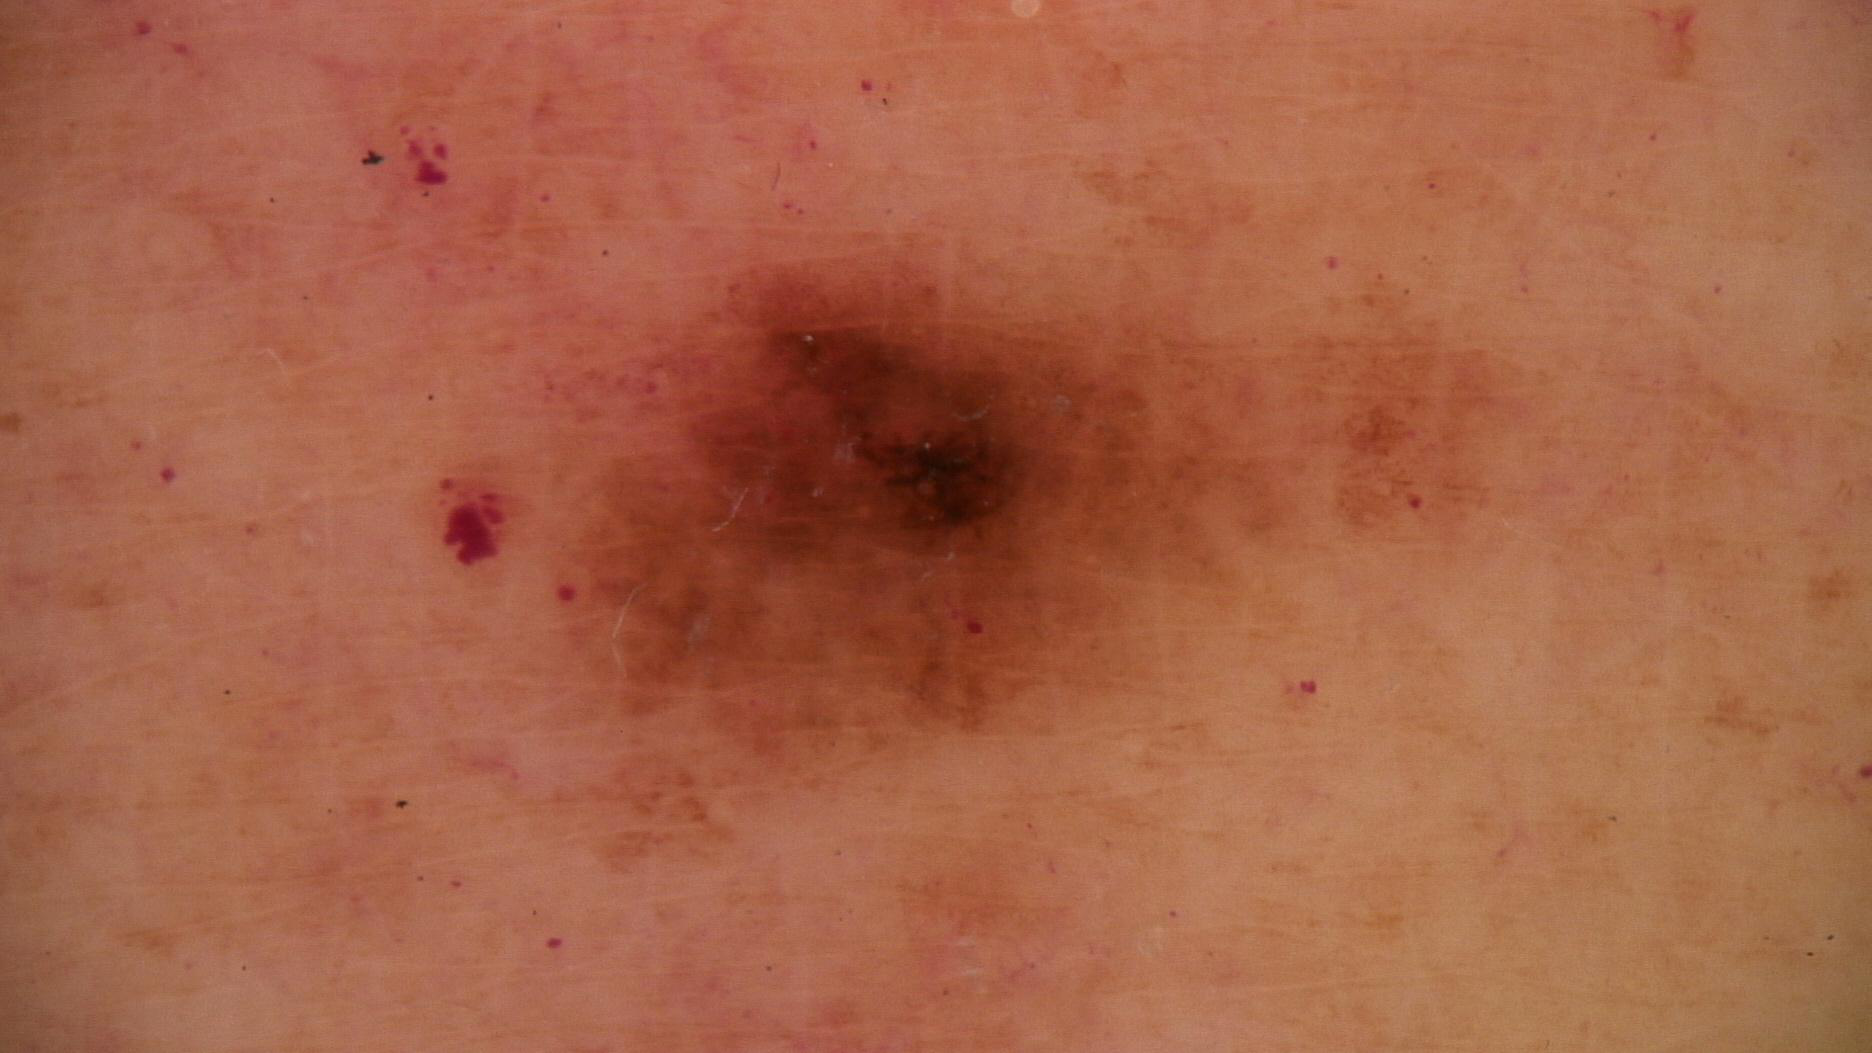

In [ ]:
image.load_img('/content/drive/Shared drives/Melanoma/TodasImagens/jpeg/train/'+amostras_unificadas['image_name'].iloc[256]+'.jpg')

## Tratamento 1

**--- Base de Amostra de Treino 1- Imagens com aplicação de cropped ( recorte)  central da imagem por altura e largura**

In [ ]:
new_width= 400
new_height = 400

train_image = []
for i in tqdm(range(amostras_unificadas.shape[0])):
  #  print(str(i) + " - " + teste['image_name'].iloc[i])
    img = image.load_img('/content/drive/Shared drives/Melanoma/TodasImagens/jpeg/train/'+amostras_unificadas['image_name'].iloc[i]+'.jpg')
    width, height = img.size   # Get dimensions
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2
    img = img.crop((left, top, right, bottom))
    img = image.img_to_array(img) # transforma  o formato de PIL imagem para uma matriz Numpy.
    img = img/255  # imagens coloridas
    train_image.append(img)
X_train = np.array(train_image)
#X_train.astype(np.float32)
X_train.shape

100%|██████████| 358/358 [04:02<00:00,  1.48it/s]


(358, 400, 400, 3)

Visualização de algumas imagens com o **Tratamento 1**:

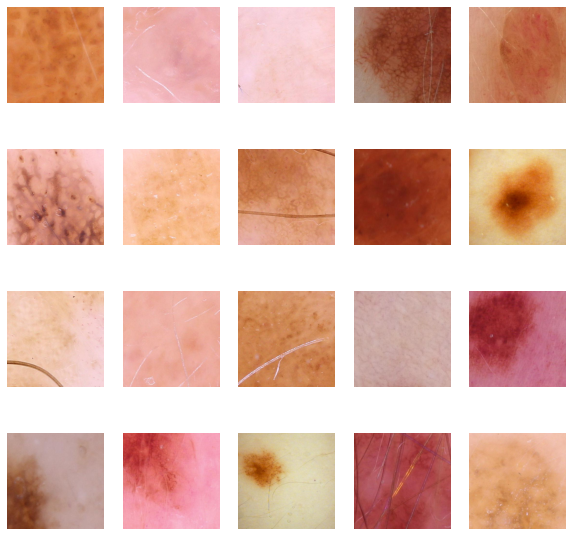

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(4 * 5):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')

## Tratamento 2

**--- Base de Amostra de Treino 2- Imagens com aplicação de cropped ( recorte)  central da imagem por pixel, localização  top-left e bottom-right**

In [ ]:
from PIL import Image

train_image_cpp = []
for i in tqdm(range(amostras_unificadas.shape[0])):
#    print(str(i) + " - " + amostras_unificadas['image_name'].iloc[i])
    image = Image.open('/content/drive/Shared drives/Melanoma/TodasImagens/jpeg/train/'+amostras_unificadas['image_name'].iloc[i]+'.jpg') #,target_size=(400,400,3)) #,target_size=(400,400,3))
#    image = Image.open('/content/drive/Shared drives/Melanoma/TodasImagens/jpeg/train/'+amostras_unificadas['image_name'].iloc[256]+'.jpg')
    image = image.crop((400, 400, 800, 800))
    image=  image.convert('RGB')
    image = np.asarray(image)
    train_image_cpp.append(image)
X_train = np.array(train_image_cpp)
#X_train.astype(np.float32)
X_train.shape

100%|██████████| 358/358 [00:43<00:00,  8.15it/s]


(358, 400, 400, 3)

Visualização de algumas imagens com o **Tratamento 2**:

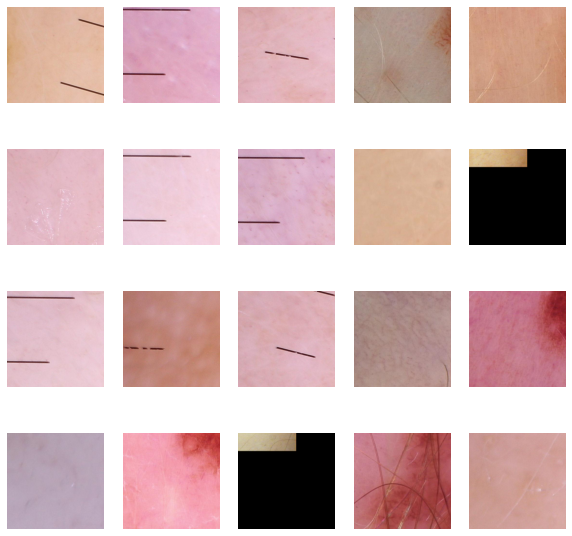

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(4 * 5):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')

## Tratamento 3

**--- Base de Amostra de Treino 3 - Keras Target_Resize como (400,400,3)**

In [ ]:
#amostras_unificadas['image_name'].iloc[[179]]
from keras.preprocessing import image

train_image = []
for i in tqdm(range(amostras_unificadas.shape[0])):
  #  print(str(i) + " - " + teste['image_name'].iloc[i])
    img = image.load_img('/content/drive/Shared drives/Melanoma/TodasImagens/jpeg/train/'+amostras_unificadas['image_name'].iloc[i]+'.jpg',target_size=(400,400,3)) #,target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X_train = np.array(train_image)
#X_train.astype(np.float32)
X_train.shape

100%|██████████| 358/358 [00:49<00:00,  7.20it/s]


(358, 400, 400, 3)

Visualização de algumas imagens com o **Tratamento 3**:

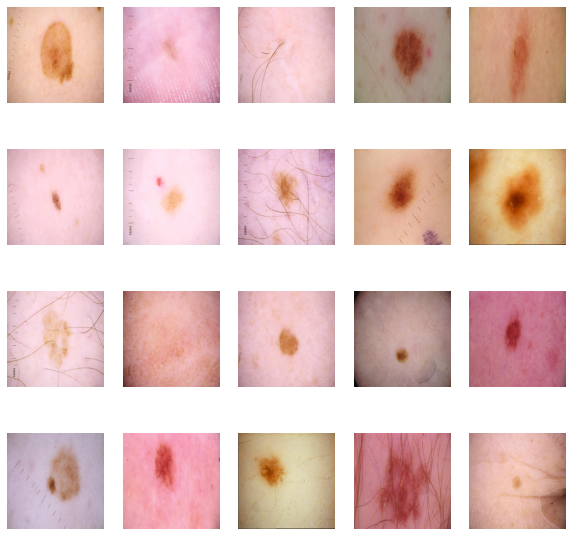

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(4 * 5):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')

### Da visualização das imagens tratadas, percebemos que somente os tratamentos 1 e 3 podem ser usados nesse estudo.

# **Trabalhando somente com os labels (maligno ou benigno) das imagens**

In [ ]:
y_train = (amostras_unificadas.drop(['image_name', 'patient_id','sex', 'age_approx', 'anatom_site_general_challenge', 'diagnosis', 'benign_malignant',  ],axis=1))
y_train=np.array(y_train)
y_train.shape

(358, 1)

## **Divisão da amostra_unificada em treino e validação**

Antes de testar os modelos, é necessário dividir a amostra de treino acima em dois conjuntos: treino e validação. 80% dos dados de (X_train, y_train) serão o novo conjunto de treino ( X_train_f, y_train_f)

In [ ]:
X_train_f, X_valid, y_train_f, y_valid = train_test_split(X_train, y_train, random_state=77, test_size=0.20)

In [ ]:
print('amostras em treino: %i' % X_train_f.shape[0],
      'amostras em validação: %i' % X_valid.shape[0],
      'número de características: %i' % X_train_f.shape[1],
      'número de características validação: %i' % X_valid.shape[1],
      'número de classes: %i' % (np.max(y_train_f) + 1),
      sep='\n', end='\n\n')

amostras em treino: 286
amostras em validação: 72
número de características: 400
número de características validação: 400
número de classes: 2



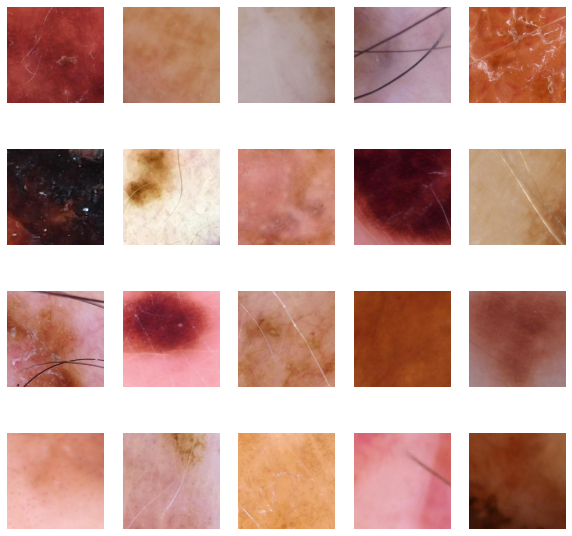

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(4 * 5):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train_f[i])
    plt.axis('off')

## **REFERÊNCIAS:**

https://www.pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/

https://keras.io/api/preprocessing/image/


https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/
https://www.it-swarm.dev/pt/python/amostragem-estratificada-em-pandas/832430095/
http://scikit.ml/stratification.html


https://www.netquest.com/blog/br/blog/br/amostragem-probabilistica-amostra-estratificada#:~:text=Wh%20%C3%A9%20o%20peso%20que,esta%20camada%20representa%20na%20popula%C3%A7%C3%A3o


# **Modelagem**

#  **Baseline**

Como o nosso baseline, resolvemos escolher uma arquitetura já implementada e pré-treinada na ImageNet.

No site https://keras.io/api/applications/, escolhemos, inicialmente, a ResNet50 para usar seus pesos. A escolha baseou-se na performance desse modelo pré-treinado com os datasets de validação da Imagenet. Chamamos essa arquitetura de modelo1.

Descartamos a saída original e congelamos as camadas. Em seguida, adcionamos uma nova camada de saída com 2 classes.

In [ ]:
# Carregamento do modelo pré-treinado SEM as camadas densas (include_top = False)
modelo1 = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)
#modelo1.summary()

In [ ]:
# Congela camadas pré-treinadas
for layer in modelo1.layers:
    layer.trainable = False

# Insere novas camadas no fim da rede para classificação
baseline = tf.keras.Sequential([
  modelo1,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])

baseline.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# Instancia um otimizador SGD, compila e treina o modelo completo
sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.5)

baseline.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

## **Experimento 1: Baseline usando imagens com tratamento 1:**

In [ ]:
from keras.utils import np_utils

y_train_f = np_utils.to_categorical(y_train_f, 2)
y_valid = np_utils.to_categorical(y_valid, 2)
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_train_f)

In [ ]:
# Número de épocas e o tamanho do batch 
epocas = 100
tam_batch = 32
# Treinamento da rede
resultado = baseline.fit_generator(datagen.flow(X_train_f, y_train_f, batch_size=tam_batch), validation_data=(X_valid, y_valid),steps_per_epoch=len(X_train_f) // tam_batch, epochs=epocas)

Epoch 1/100
8/8 [==============================] - 4s 498ms/step - loss: 0.7161 - accuracy: 0.5078 - val_loss: 0.6952 - val_accuracy: 0.4722
Epoch 2/100
8/8 [==============================] - 3s 407ms/step - loss: 0.7273 - accuracy: 0.4449 - val_loss: 0.6943 - val_accuracy: 0.4722
Epoch 3/100
8/8 [==============================] - 3s 413ms/step - loss: 0.6960 - accuracy: 0.5551 - val_loss: 0.7035 - val_accuracy: 0.5278
Epoch 4/100
8/8 [==============================] - 3s 412ms/step - loss: 0.7137 - accuracy: 0.4843 - val_loss: 0.6938 - val_accuracy: 0.5278
Epoch 5/100
8/8 [==============================] - 3s 409ms/step - loss: 0.7042 - accuracy: 0.4843 - val_loss: 0.6950 - val_accuracy: 0.5278
Epoch 6/100
8/8 [==============================] - 3s 411ms/step - loss: 0.7084 - accuracy: 0.4606 - val_loss: 0.6964 - val_accuracy: 0.5278
Epoch 7/100
8/8 [==============================] - 3s 401ms/step - loss: 0.7215 - accuracy: 0.4961 - val_loss: 0.7035 - val_accuracy: 0.4722
Epoch 8/100
8

### **Avaliação do experimento 1 (baseline)**

In [ ]:
def grafico_loss_epoca(modelo):  
    plt.plot(modelo.history['loss'])
    plt.plot(modelo.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('época')
    plt.legend(['treino', 'validação'], loc='upper left')
    plt.show()

Gráfico loss X época experimento 1 (baseline)

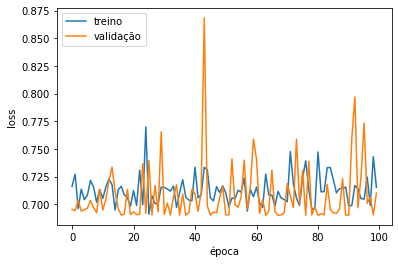

In [ ]:
#Gráfico loss x época do modelo baseline
grafico_loss_epoca(resultado)

AUC do experimento 1 (baseline)

In [ ]:
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_valid)
validation_generator = datagen.flow(X_valid, y_valid, batch_size=tam_batch)

In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

# 
preds = baseline.predict(validation_generator)

batch_index = 0
data_list = []
while batch_index <= validation_generator.batch_index:
    _, label = validation_generator.next()
    data_list.extend(label)
    batch_index = batch_index + 1

gt = np.argmax(data_list, axis=1)
auc = roc_auc_score(gt, preds[:,1])
print("auc :", auc)

auc : 0.6346749226006192


## **Experimento 2: Baseline usando imagens com tratamento 3:**

In [ ]:
from keras.utils import np_utils

y_train_f = np_utils.to_categorical(y_train_f, 2)
y_valid = np_utils.to_categorical(y_valid, 2)
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_train_f)

In [ ]:
# initialize the number of epochs and batch size
epocas = 100
tam_batch = 32
# train the network
resultado2 = baseline.fit_generator(datagen.flow(X_train_f, y_train_f, batch_size=tam_batch), validation_data=(X_valid, y_valid),steps_per_epoch=len(X_train_f) // tam_batch, epochs=epocas)

Epoch 1/100
8/8 [==============================] - 4s 500ms/step - loss: 0.7574 - accuracy: 0.5078 - val_loss: 0.7013 - val_accuracy: 0.4722
Epoch 2/100
8/8 [==============================] - 3s 410ms/step - loss: 0.7110 - accuracy: 0.4803 - val_loss: 0.6957 - val_accuracy: 0.5278
Epoch 3/100
8/8 [==============================] - 3s 418ms/step - loss: 0.7067 - accuracy: 0.4921 - val_loss: 0.7072 - val_accuracy: 0.4722
Epoch 4/100
8/8 [==============================] - 3s 413ms/step - loss: 0.7007 - accuracy: 0.4961 - val_loss: 0.7146 - val_accuracy: 0.5278
Epoch 5/100
8/8 [==============================] - 3s 413ms/step - loss: 0.7160 - accuracy: 0.5039 - val_loss: 0.6989 - val_accuracy: 0.4722
Epoch 6/100
8/8 [==============================] - 3s 410ms/step - loss: 0.7283 - accuracy: 0.4449 - val_loss: 0.6945 - val_accuracy: 0.5278
Epoch 7/100
8/8 [==============================] - 3s 404ms/step - loss: 0.7021 - accuracy: 0.4646 - val_loss: 0.6938 - val_accuracy: 0.5278
Epoch 8/100
8

### **Avaliação do experimento 2 (baseline2)**

Gráfico loss X época experimento 2 (baseline2)

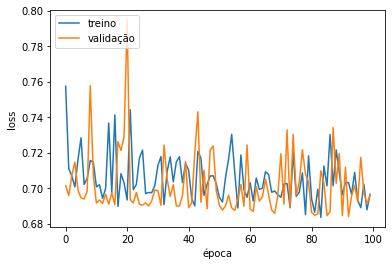

In [ ]:
#Gráfico loss x época do modelo baseline2
grafico_loss_epoca(resultado2)

AUC do experimento 2 (baseline2)

In [ ]:
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_valid)
validation_generator = datagen.flow(X_valid, y_valid, batch_size=tam_batch)

In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

# 
preds = baseline.predict(validation_generator)

batch_index = 0
data_list = []
while batch_index <= validation_generator.batch_index:
    _, label = validation_generator.next()
    data_list.extend(label)
    batch_index = batch_index + 1

gt = np.argmax(data_list, axis=1)
auc = roc_auc_score(gt, preds[:,1])
print("auc :", auc)

auc : 0.4404024767801858


## **Experimento 3** : VGG16 com imagens do tratamento 1

Mudamos a arquitetura pré-treinada. Usamos a VGG16 por ser muito utilizada na literatura. 

In [ ]:
# Carregamento do modelo pré-treinado SEM as camadas densas (include_top = False)
modelo2 = tf.keras.applications.VGG16(weights='imagenet', include_top=False)

In [ ]:
#Congela camadas pré-treinadas
for layer in modelo2.layers:
    layer.trainable = False

# Insere novas camadas no fim da rede para classificação
experimento3 = tf.keras.Sequential([
  modelo2,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])

experimento3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d_8 ( (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# Instancia um otimizador SGD, compila e treina o modelo completo
sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.5)
experimento3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
from keras.utils import np_utils

y_train_f = np_utils.to_categorical(y_train_f, 2)
y_valid = np_utils.to_categorical(y_valid, 2)
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_train_f)

In [ ]:
# Número de épocas e o tamanho do batch 
epocas = 100
tam_batch = 32
# Treinamento da rede
resultado3 = experimento3.fit_generator(datagen.flow(X_train_f, y_train_f, batch_size=tam_batch), validation_data=(X_valid, y_valid),steps_per_epoch=len(X_train_f) // tam_batch, epochs=epocas)

Epoch 1/100
8/8 [==============================] - 4s 514ms/step - loss: 0.7035 - accuracy: 0.4055 - val_loss: 0.6991 - val_accuracy: 0.4861
Epoch 2/100
8/8 [==============================] - 4s 499ms/step - loss: 0.7034 - accuracy: 0.4134 - val_loss: 0.7002 - val_accuracy: 0.4306
Epoch 3/100
8/8 [==============================] - 4s 506ms/step - loss: 0.7019 - accuracy: 0.4252 - val_loss: 0.6974 - val_accuracy: 0.5139
Epoch 4/100
8/8 [==============================] - 4s 510ms/step - loss: 0.7011 - accuracy: 0.4016 - val_loss: 0.6981 - val_accuracy: 0.5278
Epoch 5/100
8/8 [==============================] - 4s 503ms/step - loss: 0.6991 - accuracy: 0.4528 - val_loss: 0.6971 - val_accuracy: 0.4722
Epoch 6/100
8/8 [==============================] - 4s 498ms/step - loss: 0.7019 - accuracy: 0.4370 - val_loss: 0.6983 - val_accuracy: 0.5139
Epoch 7/100
8/8 [==============================] - 4s 488ms/step - loss: 0.6986 - accuracy: 0.4449 - val_loss: 0.7023 - val_accuracy: 0.4722
Epoch 8/100
8

### **Avaliação do experimento 3**

Gráfico loss X época experimento 3

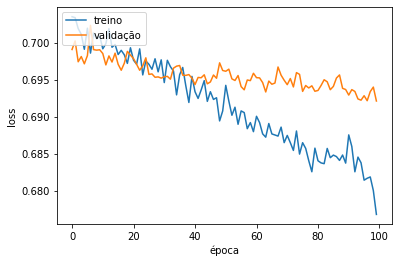

In [ ]:
#Gráfico loss x época do experimento3
grafico_loss_epoca(resultado3)

AUC do experimento 3

In [ ]:
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_valid)
validation_generator = datagen.flow(X_valid, y_valid, batch_size=tam_batch)

In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

# 
preds = experimento3.predict(validation_generator)

batch_index = 0
data_list = []
while batch_index <= validation_generator.batch_index:
    _, label = validation_generator.next()
    data_list.extend(label)
    batch_index = batch_index + 1

gt = np.argmax(data_list, axis=1)
auc = roc_auc_score(gt, preds[:,1])
print("auc :", auc)

auc : 0.41873065015479877


## **Experimento 4** : VGG16 com imagens do tratamento 3

Usamos VGG16 com fine-tunning com as imagens do tratamento 3

In [ ]:
#Congela camadas pré-treinadas
for layer in modelo2.layers:
    layer.trainable = False

# Insere novas camadas no fim da rede para classificação
experimento4 = tf.keras.Sequential([
  modelo2,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])

experimento4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# Instancia um otimizador SGD, compila e treina o modelo completo
sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.5)
experimento4.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
from keras.utils import np_utils

y_train_f = np_utils.to_categorical(y_train_f, 2)
y_valid = np_utils.to_categorical(y_valid, 2)
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_train_f)

In [ ]:
# Número de épocas e o tamanho do batch 
epocas = 100
tam_batch = 32
# Treinamento da rede
resultado4 = experimento4.fit_generator(datagen.flow(X_train_f, y_train_f, batch_size=tam_batch), validation_data=(X_valid, y_valid),steps_per_epoch=len(X_train_f) // tam_batch, epochs=epocas)

Epoch 1/100
8/8 [==============================] - 4s 520ms/step - loss: 0.7294 - accuracy: 0.4921 - val_loss: 0.7168 - val_accuracy: 0.4722
Epoch 2/100
8/8 [==============================] - 4s 508ms/step - loss: 0.7062 - accuracy: 0.4883 - val_loss: 0.7087 - val_accuracy: 0.4167
Epoch 3/100
8/8 [==============================] - 4s 512ms/step - loss: 0.7054 - accuracy: 0.4646 - val_loss: 0.7045 - val_accuracy: 0.3889
Epoch 4/100
8/8 [==============================] - 4s 513ms/step - loss: 0.7038 - accuracy: 0.4531 - val_loss: 0.7050 - val_accuracy: 0.3889
Epoch 5/100
8/8 [==============================] - 4s 505ms/step - loss: 0.7041 - accuracy: 0.4488 - val_loss: 0.7059 - val_accuracy: 0.3750
Epoch 6/100
8/8 [==============================] - 4s 496ms/step - loss: 0.7043 - accuracy: 0.4764 - val_loss: 0.7056 - val_accuracy: 0.3750
Epoch 7/100
8/8 [==============================] - 4s 491ms/step - loss: 0.7036 - accuracy: 0.4528 - val_loss: 0.7059 - val_accuracy: 0.3889
Epoch 8/100
8

### **Avaliação do experimento 4**

Gráfico loss X época experimento 4

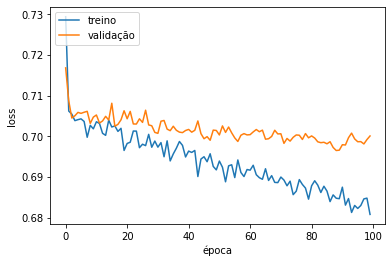

In [ ]:
#Gráfico loss x época do experimento4
grafico_loss_epoca(resultado4)

AUC do experimento 4

In [ ]:
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_valid)
validation_generator = datagen.flow(X_valid, y_valid, batch_size=tam_batch)

In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

# 
preds = experimento4.predict(validation_generator)

batch_index = 0
data_list = []
while batch_index <= validation_generator.batch_index:
    _, label = validation_generator.next()
    data_list.extend(label)
    batch_index = batch_index + 1

gt = np.argmax(data_list, axis=1)
auc = roc_auc_score(gt, preds[:,1])
print("auc :", auc)

auc : 0.4009287925696594


## **Experimento 5** : VGG16 com imagens do tratamento 1

Usamos VGG16 com fine-tunning com as imagens do tratamento 1, camada densa com função de ativação relu e com uma menor taxa de aprendizado (0.0001) e mesmo momentum.

In [ ]:
#Congela camadas pré-treinadas
for layer in modelo2.layers:
    layer.trainable = False

# Insere novas camadas no fim da rede para classificação
experimento5 = tf.keras.Sequential([
  modelo2,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='relu')
])

experimento5.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d_9 ( (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# Instancia um otimizador SGD, compila e treina o modelo completo
sgd = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.5)
experimento5.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
from keras.utils import np_utils

y_train_f = np_utils.to_categorical(y_train_f, 2)
y_valid = np_utils.to_categorical(y_valid, 2)
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_train_f)

In [ ]:
# Número de épocas e o tamanho do batch 
epocas = 100
tam_batch = 32
# Treinamento da rede
resultado5 = experimento5.fit_generator(datagen.flow(X_train_f, y_train_f, batch_size=tam_batch), validation_data=(X_valid, y_valid),steps_per_epoch=len(X_train_f) // tam_batch, epochs=epocas)

Epoch 1/100
8/8 [==============================] - 3s 434ms/step - loss: 0.7947 - accuracy: 0.5118 - val_loss: 0.7351 - val_accuracy: 0.4444
Epoch 2/100
8/8 [==============================] - 3s 420ms/step - loss: 0.6983 - accuracy: 0.5039 - val_loss: 0.7145 - val_accuracy: 0.4444
Epoch 3/100
8/8 [==============================] - 3s 419ms/step - loss: 0.6892 - accuracy: 0.5236 - val_loss: 0.7087 - val_accuracy: 0.4444
Epoch 4/100
8/8 [==============================] - 3s 420ms/step - loss: 0.6888 - accuracy: 0.5079 - val_loss: 0.7062 - val_accuracy: 0.4167
Epoch 5/100
8/8 [==============================] - 3s 422ms/step - loss: 0.6866 - accuracy: 0.5551 - val_loss: 0.7044 - val_accuracy: 0.4861
Epoch 6/100
8/8 [==============================] - 3s 426ms/step - loss: 0.6881 - accuracy: 0.5742 - val_loss: 0.7035 - val_accuracy: 0.5139
Epoch 7/100
8/8 [==============================] - 3s 426ms/step - loss: 0.6873 - accuracy: 0.5984 - val_loss: 0.7035 - val_accuracy: 0.5139
Epoch 8/100
8

### **Avaliação do experimento 5**

Gráfico loss X época experimento 5

Mudar a função de ativação da camada densa causou o overfitting?

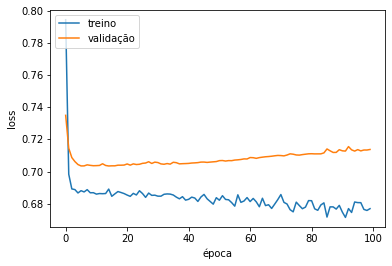

In [ ]:
#Gráfico loss x época do experimento5
grafico_loss_epoca(resultado5)

AUC do experimento 5

In [ ]:
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_valid)
validation_generator = datagen.flow(X_valid, y_valid, batch_size=tam_batch)

In [ ]:
# 
preds = experimento5.predict(validation_generator)

batch_index = 0
data_list = []
while batch_index <= validation_generator.batch_index:
    _, label = validation_generator.next()
    data_list.extend(label)
    batch_index = batch_index + 1

gt = np.argmax(data_list, axis=1)
auc = roc_auc_score(gt, preds[:,1])
print("auc :", auc)

auc : 0.5402476780185759


## **Experimento 6** : ResNet152 com imagens do tratamento 1

Usamos agora a ResNet152 com fine-tunning com as imagens do tratamento 1, camada densa com função de ativação softmax e com a mesma taxa de aprendizado (0.001) e mesmo momentum.

In [ ]:
# Carregamento do modelo pré-treinado SEM as camadas densas (include_top = False)
modelo3 = tf.keras.applications.ResNet152(weights='imagenet', include_top=False)

In [ ]:
#Congela camadas pré-treinadas
for layer in modelo3.layers:
    layer.trainable = False

# Insere novas camadas no fim da rede para classificação
experimento6 = tf.keras.Sequential([
  modelo3,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])

experimento6.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, None, None, 2048)  58370944  
_________________________________________________________________
global_average_pooling2d_11  (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 4098      
Total params: 58,375,042
Trainable params: 4,098
Non-trainable params: 58,370,944
_________________________________________________________________


In [ ]:
# Instancia um otimizador SGD, compila e treina o modelo completo
sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.5)
experimento6.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:

y_train_f = np_utils.to_categorical(y_train_f, 2)
y_valid = np_utils.to_categorical(y_valid, 2)
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_train_f)

In [ ]:
# Número de épocas e o tamanho do batch 
epocas = 100
tam_batch = 32
# Treinamento da rede
resultado6 = experimento6.fit_generator(datagen.flow(X_train_f, y_train_f, batch_size=tam_batch), validation_data=(X_valid, y_valid),steps_per_epoch=len(X_train_f) // tam_batch, epochs=epocas)

Epoch 1/100
8/8 [==============================] - 9s 1s/step - loss: 0.8068 - accuracy: 0.4843 - val_loss: 0.7287 - val_accuracy: 0.4722
Epoch 2/100
8/8 [==============================] - 7s 916ms/step - loss: 0.7229 - accuracy: 0.5079 - val_loss: 0.6925 - val_accuracy: 0.5278
Epoch 3/100
8/8 [==============================] - 8s 940ms/step - loss: 0.7125 - accuracy: 0.4685 - val_loss: 0.7019 - val_accuracy: 0.5278
Epoch 4/100
8/8 [==============================] - 8s 959ms/step - loss: 0.7125 - accuracy: 0.5354 - val_loss: 0.6957 - val_accuracy: 0.4722
Epoch 5/100
8/8 [==============================] - 8s 949ms/step - loss: 0.7023 - accuracy: 0.4882 - val_loss: 0.6953 - val_accuracy: 0.5278
Epoch 6/100
8/8 [==============================] - 7s 935ms/step - loss: 0.7462 - accuracy: 0.5039 - val_loss: 0.7094 - val_accuracy: 0.4722
Epoch 7/100
8/8 [==============================] - 7s 930ms/step - loss: 0.7109 - accuracy: 0.4961 - val_loss: 0.7242 - val_accuracy: 0.4722
Epoch 8/100
8/8 

### **Avaliação do experimento 6**

Gráfico loss x época do experimento 6

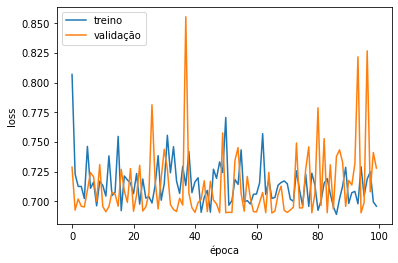

In [ ]:
#Gráfico loss x época do experimento6
grafico_loss_epoca(resultado6)

AUC do experimento 6

In [ ]:
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_valid)
validation_generator = datagen.flow(X_valid, y_valid, batch_size=tam_batch)

In [ ]:
# 
preds = experimento5.predict(validation_generator)

batch_index = 0
data_list = []
while batch_index <= validation_generator.batch_index:
    _, label = validation_generator.next()
    data_list.extend(label)
    batch_index = batch_index + 1

gt = np.argmax(data_list, axis=1)
auc = roc_auc_score(gt, preds[:,1])
print("auc :", auc)

auc : 0.43034055727554177


## **Experimento 7: Baseline MODIFICADO usando imagens com tratamento 1 e diferente taxa de aprendizado e momentum:**

Usamos o mesmo baseline, mas alteramos a taxa de aprendizagem e momentum

In [ ]:
# Instancia um otimizador SGD, compila e treina o modelo completo
sgd = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)

baseline.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
from keras.utils import np_utils
y_train_f = np_utils.to_categorical(y_train_f, 2)
y_valid = np_utils.to_categorical(y_valid, 2)
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_train_f)

In [ ]:
# Número de épocas e o tamanho do batch 
epocas = 100
tam_batch = 32
# Treinamento da rede
resultado_modificado = baseline.fit_generator(datagen.flow(X_train_f, y_train_f, batch_size=tam_batch), validation_data=(X_valid, y_valid),steps_per_epoch=len(X_train_f) // tam_batch, epochs=epocas)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
8/8 [==============================] - 4s 507ms/step - loss: 1.1886 - accuracy: 0.5117 - val_loss: 0.6919 - val_accuracy: 0.5417
Epoch 2/100
8/8 [==============================] - 4s 461ms/step - loss: 0.8251 - accuracy: 0.4921 - val_loss: 0.8180 - val_accuracy: 0.5278
Epoch 3/100
8/8 [==============================] - 3s 360ms/step - loss: 0.7334 - accuracy: 0.5117 - val_loss: 0.7768 - val_accuracy: 0.4722
Epoch 4/100
8/8 [==============================] - 3s 359ms/step - loss: 0.7513 - accuracy: 0.5197 - val_loss: 0.7027 - val_accuracy: 0.4722
Epoch 5/100
8/8 [==============================] - 3s 362ms/step - loss: 0.7016 - accuracy: 0.5469 - val_loss: 0.7013 - val_accuracy: 0.5278
Epoch 6/100
8/8 [==============================] - 3s 363ms/step - loss: 0.7094 - accuracy: 0.4803 - val_loss: 0.7102 - val_accuracy: 0.4722
Epoch 7/100
8/8 [==============================] - 3s 362ms/step - loss: 0.706

### **Avaliação do experimento 7**

Gráfico loss x época do experimento 7

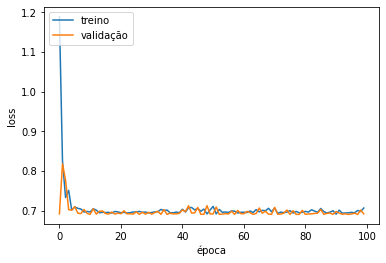

In [ ]:
#Gráfico loss x época do experimento7
grafico_loss_epoca(resultado_modificado)

AUC do experimento 7

In [ ]:
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_valid)
validation_generator = datagen.flow(X_valid, y_valid, batch_size=tam_batch)

In [ ]:
# 
preds = baseline.predict(validation_generator)

batch_index = 0
data_list = []
while batch_index <= validation_generator.batch_index:
    _, label = validation_generator.next()
    data_list.extend(label)
    batch_index = batch_index + 1

gt = np.argmax(data_list, axis=1)
auc = roc_auc_score(gt, preds[:,1])
print("auc :", auc)

auc : 0.5224458204334365


## **Experimento 8: Baseline MODIFICADO 2 usando imagens com tratamento 1 e diferente momentum:**

Mudamos o momentum para 0.9

In [ ]:
# Instancia um otimizador SGD, compila e treina o modelo completo
sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)

baseline.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
from keras.utils import np_utils
y_train_f = np_utils.to_categorical(y_train_f, 2)
y_valid = np_utils.to_categorical(y_valid, 2)
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_train_f)

In [ ]:
# Número de épocas e o tamanho do batch 
epocas = 100
tam_batch = 32
# Treinamento da rede
resultado_modificado2 = baseline.fit_generator(datagen.flow(X_train_f, y_train_f, batch_size=tam_batch), validation_data=(X_valid, y_valid),steps_per_epoch=len(X_train_f) // tam_batch, epochs=epocas)

Epoch 1/100
8/8 [==============================] - 4s 457ms/step - loss: 0.7221 - accuracy: 0.4606 - val_loss: 0.7115 - val_accuracy: 0.4722
Epoch 2/100
8/8 [==============================] - 3s 361ms/step - loss: 0.6997 - accuracy: 0.4843 - val_loss: 0.7369 - val_accuracy: 0.4722
Epoch 3/100
8/8 [==============================] - 3s 360ms/step - loss: 0.7927 - accuracy: 0.4803 - val_loss: 0.9204 - val_accuracy: 0.4722
Epoch 4/100
8/8 [==============================] - 3s 364ms/step - loss: 0.8939 - accuracy: 0.5039 - val_loss: 0.7844 - val_accuracy: 0.4722
Epoch 5/100
8/8 [==============================] - 3s 361ms/step - loss: 0.8588 - accuracy: 0.5039 - val_loss: 0.7510 - val_accuracy: 0.4722
Epoch 6/100
8/8 [==============================] - 3s 361ms/step - loss: 0.7653 - accuracy: 0.5354 - val_loss: 0.7568 - val_accuracy: 0.4722
Epoch 7/100
8/8 [==============================] - 3s 365ms/step - loss: 0.8753 - accuracy: 0.4567 - val_loss: 0.7872 - val_accuracy: 0.5278
Epoch 8/100
8

### **Avaliação do experimento 8**

Gráfico loss x época do experimento 8

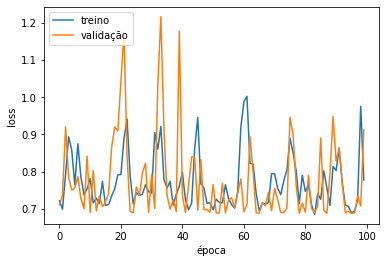

In [ ]:
#Gráfico loss x época do experimento8
grafico_loss_epoca(resultado_modificado2)

AUC do experimento 8

In [ ]:
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_valid)
validation_generator = datagen.flow(X_valid, y_valid, batch_size=tam_batch)

In [ ]:
# 
preds = baseline.predict(validation_generator)

batch_index = 0
data_list = []
while batch_index <= validation_generator.batch_index:
    _, label = validation_generator.next()
    data_list.extend(label)
    batch_index = batch_index + 1

gt = np.argmax(data_list, axis=1)
auc = roc_auc_score(gt, preds[:,1])
print("auc :", auc)

auc : 0.4388544891640867


## **Experimento 9: Baseline MODIFICADO usando imagens com tratamento 4 (imagens maiores com tamanho 800x800) e MESMAS condições do baseline:**

Nesse experimento, usamos as imagens maiores e mais épocas para investigar o comportamento da loss

## Tratamento 4

**--- Base de Amostra de Treino 1- Imagens com aplicação de cropped (recorte) central da imagem por altura e largura : tamanho NOVO 800x800**

In [ ]:
new_width= 800
new_height = 800

train_image = []
for i in tqdm(range(amostras_unificadas.shape[0])):
  #  print(str(i) + " - " + teste['image_name'].iloc[i])
    img = image.load_img('/content/drive/Shared drives/Melanoma/TodasImagens/jpeg/train/'+amostras_unificadas['image_name'].iloc[i]+'.jpg')
    width, height = img.size   # Get dimensions
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2
    img = img.crop((left, top, right, bottom))
    img = image.img_to_array(img) # transforma  o formato de PIL imagem para uma matriz Numpy.
    img = img/255  # imagens coloridas
    train_image.append(img)
X_train = np.array(train_image)
#X_train.astype(np.float32)
X_train.shape

100%|██████████| 358/358 [00:45<00:00,  7.79it/s]


(358, 800, 800, 3)

In [ ]:
X_train_f, X_valid, y_train_f, y_valid = train_test_split(X_train, y_train, random_state=42, test_size=0.20)

In [ ]:
from keras.utils import np_utils

y_train_f = np_utils.to_categorical(y_train_f, 2)
y_valid = np_utils.to_categorical(y_valid, 2)
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_train_f)

In [ ]:
# Número de épocas e o tamanho do batch 
epocas = 1000
tam_batch = 32
# Treinamento da rede
resultado_exp9 = baseline.fit_generator(datagen.flow(X_train_f, y_train_f, batch_size=tam_batch), validation_data=(X_valid, y_valid),steps_per_epoch=len(X_train_f) // tam_batch, epochs=epocas)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/1000
8/8 [==============================] - 9s 1s/step - loss: 1.0485 - accuracy: 0.5039 - val_loss: 0.6913 - val_accuracy: 0.5972
Epoch 2/1000
8/8 [==============================] - 6s 779ms/step - loss: 0.7323 - accuracy: 0.5157 - val_loss: 0.8439 - val_accuracy: 0.5278
Epoch 3/1000
8/8 [==============================] - 6s 791ms/step - loss: 0.7947 - accuracy: 0.5197 - val_loss: 0.9194 - val_accuracy: 0.4722
Epoch 4/1000
8/8 [==============================] - 6s 784ms/step - loss: 0.9368 - accuracy: 0.5000 - val_loss: 0.6973 - val_accuracy: 0.4722
Epoch 5/1000
8/8 [==============================] - 6s 771ms/step - loss: 0.7542 - accuracy: 0.5000 - val_loss: 0.6898 - val_accuracy: 0.5278
Epoch 6/1000
8/8 [==============================] - 6s 782ms/step - loss: 0.7326 - accuracy: 0.5591 - val_loss: 0.6977 - val_accuracy: 0.4722
Epoch 7/1000
8/8 [==============================] - 6s 789ms/step - loss: 1

### **Avaliação do experimento 9**

Gráfico loss x época do experimento 9

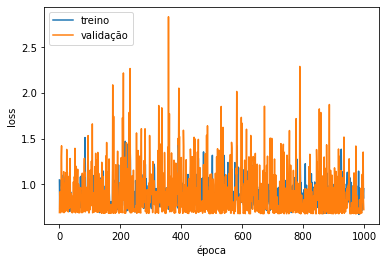

In [ ]:
#Gráfico loss x época do experimento9
grafico_loss_epoca(resultado_exp9)

AUC experimento 9

In [ ]:
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_valid)
validation_generator = datagen.flow(X_valid, y_valid, batch_size=tam_batch)

In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

# 
preds = baseline.predict(validation_generator)

batch_index = 0
data_list = []
while batch_index <= validation_generator.batch_index:
    _, label = validation_generator.next()
    data_list.extend(label)
    batch_index = batch_index + 1

gt = np.argmax(data_list, axis=1)
auc = roc_auc_score(gt, preds[:,1])
print("auc :", auc)

auc : 0.5642414860681114


## **Experimento 10: Baseline MODIFICADO usando imagens com tratamento 1 e MESMAS condições do baseline, porém usando aumentação de dados:**

A ideia desse experimento é usar o modelo com o maior AUC obtido porém usando a técnica de aumentação de dados. A justificativa é que usamos todas as imagens de lesões malignas e queremos aumentar a variabilidade para ver seu impacto no mesmo modelo.

In [ ]:
from keras.utils import np_utils

y_train_f = np_utils.to_categorical(y_train_f, 2)
y_valid = np_utils.to_categorical(y_valid, 2)
datagen = ImageDataGenerator(brightness_range=[0.2,1.0], zoom_range=[0.4,1.2], rescale=1./255)
datagen.fit(X_train_f)

In [ ]:
# Número de épocas e o tamanho do batch 
epocas = 500
tam_batch = 32
# Treinamento da rede
resultado = baseline.fit_generator(datagen.flow(X_train_f, y_train_f, batch_size=tam_batch), validation_data=(X_valid, y_valid),steps_per_epoch=len(X_train_f) // tam_batch, epochs=epocas)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/500
8/8 [==============================] - 11s 1s/step - loss: 0.7252 - accuracy: 0.5315 - val_loss: 0.6980 - val_accuracy: 0.5278
Epoch 2/500
8/8 [==============================] - 10s 1s/step - loss: 0.6937 - accuracy: 0.5315 - val_loss: 0.6931 - val_accuracy: 0.5278
Epoch 3/500
8/8 [==============================] - 10s 1s/step - loss: 0.6995 - accuracy: 0.4646 - val_loss: 0.7173 - val_accuracy: 0.4722
Epoch 4/500
8/8 [==============================] - 10s 1s/step - loss: 0.6946 - accuracy: 0.5236 - val_loss: 0.6928 - val_accuracy: 0.5278
Epoch 5/500
8/8 [==============================] - 10s 1s/step - loss: 0.7020 - accuracy: 0.4882 - val_loss: 0.7273 - val_accuracy: 0.4722
Epoch 6/500
8/8 [==============================] - 10s 1s/step - loss: 0.7065 - accuracy: 0.4567 - val_loss: 0.7125 - val_accuracy: 0.4722
Epoch 7/500
8/8 [==============================] - 10s 1s/step - loss: 0.7000 - accuracy: 

## **Avaliação do experimento 10**

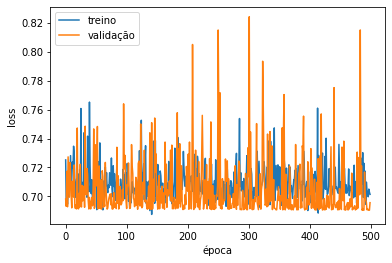

In [ ]:
#Gráfico loss x época do experimento 10
grafico_loss_epoca(resultado)

AUC experimento 10

In [ ]:
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_valid)
validation_generator = datagen.flow(X_valid, y_valid, batch_size=tam_batch)

In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

# 
preds = baseline.predict(validation_generator)

batch_index = 0
data_list = []
while batch_index <= validation_generator.batch_index:
    _, label = validation_generator.next()
    data_list.extend(label)
    batch_index = batch_index + 1

gt = np.argmax(data_list, axis=1)
auc = roc_auc_score(gt, preds[:,1])
print("auc :", auc)

auc : 0.4713622291021672


## **Experimento 11:** mesmo baseline com imagens maiores (tratamento 4) e com aumentação considerando somente brilho

In [ ]:
new_width= 800
new_height = 800

train_image = []
for i in tqdm(range(amostras_unificadas.shape[0])):
  #  print(str(i) + " - " + teste['image_name'].iloc[i])
    img = image.load_img('/content/drive/Shared drives/Melanoma/TodasImagens/jpeg/train/'+amostras_unificadas['image_name'].iloc[i]+'.jpg')
    width, height = img.size   # Get dimensions
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2
    img = img.crop((left, top, right, bottom))
    img = image.img_to_array(img) # transforma  o formato de PIL imagem para uma matriz Numpy.
    img = img/255  # imagens coloridas
    train_image.append(img)
X_train = np.array(train_image)
#X_train.astype(np.float32)
X_train.shape

100%|██████████| 358/358 [03:16<00:00,  1.82it/s]


(358, 800, 800, 3)

In [ ]:
X_train_f, X_valid, y_train_f, y_valid = train_test_split(X_train, y_train, random_state=42, test_size=0.20)

In [ ]:
from keras.utils import np_utils

y_train_f = np_utils.to_categorical(y_train_f, 2)
y_valid = np_utils.to_categorical(y_valid, 2)
datagen = ImageDataGenerator(brightness_range=[0.1,1.0], rescale=1./255)
datagen.fit(X_train_f)

In [ ]:
# Número de épocas e o tamanho do batch 
epocas = 100
tam_batch = 32
# Treinamento da rede
resultado = baseline.fit_generator(datagen.flow(X_train_f, y_train_f, batch_size=tam_batch),steps_per_epoch=len(X_train_f) // tam_batch, epochs=epocas, validation_data=(X_valid, y_valid), validation_steps=len(X_valid)//tam_batch )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
8/8 [==============================] - 17s 2s/step - loss: 1.0077 - accuracy: 0.4764 - val_loss: 0.8650 - val_accuracy: 0.4722
Epoch 2/100
8/8 [==============================] - 12s 1s/step - loss: 0.9330 - accuracy: 0.4805 - val_loss: 0.7691 - val_accuracy: 0.5278
Epoch 3/100
8/8 [==============================] - 12s 1s/step - loss: 0.8761 - accuracy: 0.4921 - val_loss: 1.1568 - val_accuracy: 0.4722
Epoch 4/100
8/8 [==============================] - 12s 2s/step - loss: 1.1480 - accuracy: 0.4488 - val_loss: 0.6987 - val_accuracy: 0.5278
Epoch 5/100
8/8 [==============================] - 12s 2s/step - loss: 1.0625 - accuracy: 0.4291 - val_loss: 2.3040 - val_accuracy: 0.5278
Epoch 6/100
8/8 [==============================] - 13s 2s/step - loss: 1.3445 - accuracy: 0.4921 - val_loss: 1.0322 - val_accuracy: 0.5278
Epoch 7/100
8/8 [==============================] - 13s 2s/step - loss: 0.8710 - accuracy: 

## **Avaliação do experimento 11**

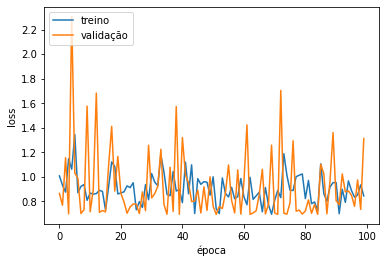

In [ ]:
#Gráfico loss x época do experimento 11
grafico_loss_epoca(resultado)

In [ ]:
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_valid)
validation_generator = datagen.flow(X_valid, y_valid, batch_size=tam_batch)

In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

# 
preds = baseline.predict(validation_generator)

batch_index = 0
data_list = []
while batch_index <= validation_generator.batch_index:
    _, label = validation_generator.next()
    data_list.extend(label)
    batch_index = batch_index + 1

gt = np.argmax(data_list, axis=1)
auc = roc_auc_score(gt, preds[:,1])
print("auc :", auc)

auc : 0.4721362229102166


# **Avaliando o experimento 1 com os dados de teste**

Para isso, devemos submeter o conjunto de imagens teste ao mesmo tratamento de imagem que submetemos o conjunto de treino.

* Verificando diretório com as imagens de testes

In [ ]:
# Confirmando as imagens existentes na pasta do Google Drive: conjunto de teste
import os
os.chdir("/content/drive/Shared drives/Melanoma/TodasImagens/jpeg/test/")
!ls

* Carregando o dataframe de testes a partir do arquivo test.csv

In [ ]:
test = pd.read_csv('/content/drive/Shared drives/Melanoma/test.csv')  

In [ ]:
print( 'Qtd. Registros no dataframe Test: ' + str(len(test)))

Qtd. Registros no dataframe Test: 10982


In [ ]:
from sklearn.model_selection import train_test_split

# Retirando os valores nulos
teste=test.copy()
teste=teste.dropna()  
# Criando indice de paciente + local da lesao ( um mesmo paciente pode ter lesao em locais diferentes)
teste.insert(0, 'paciente_anatomia',teste['patient_id'].astype(str)+ "_" + teste['anatom_site_general_challenge'].astype(str) )
# Ordenando pacientes pela maior idade
teste.sort_values(by=['age_approx'], inplace=True, ascending=False)
# Retirando pacientes com registros duplicados ( paciente + local da lesao), mantendo apenas os registros de maior idade desse paciente
teste=teste.drop_duplicates(subset='paciente_anatomia', keep='first')
teste.insert(0, 'comb_features',teste['image_name'].astype(str)+ "_" + teste['sex'].astype(str)+ "_" + teste['age_approx'].astype(str) + "_" + teste['anatom_site_general_challenge'].astype(str)) # criando um indice com as features a serem analisadas
teste['genero'] = teste['sex'].apply(lambda x: 'male' if x == 1 else 0)

X=teste['comb_features']
y=teste['genero']


####################################################################################
# Gerando Amostra de Lesoes Benignas
# Gerando uma amostra  de lesoes benignas estratificada proporcional considerando  imagem, sexo, idade, anatomia, benigno/maligno e target
# E quantidade equivalente das lesoes malignas (179)
testeX, amostraX, testey, amostray = train_test_split(X, y, test_size=0.1779, random_state=40, stratify=y)

amostra= amostraX.to_frame()

amostra_teste = pd.merge(amostra, teste, how='inner', on=['comb_features'])


amostra_teste= pd.DataFrame(amostra_teste, columns= ['image_name',	'patient_id',	'sex',	'age_approx',	'anatom_site_general_challenge'])


print('')
print(str(len(amostra_teste)))
print('amostra_teste - Qtd. distintas de genero        : '  + str(len(set(amostra_teste.sex.values))))                           # Qtd distinta de genero --->  2 = female/male
print('amostra_teste - Qtd. distintas de idade         : '  + str(len(set(amostra_teste.age_approx.values))))                    # Qtd distinta de idade  --->  15
print('amostra_teste - Qtd. distintas de local anatomia: '  + str(len(set(amostra_teste.anatom_site_general_challenge.values)))) # Qtd distinta de localizacao da lesao --> 6 head/neck, upper extremity, lower extremity, torso, palms/soles, oral/genital



358
amostra_teste - Qtd. distintas de genero        : 2
amostra_teste - Qtd. distintas de idade         : 16
amostra_teste - Qtd. distintas de local anatomia: 6


In [ ]:
amostra_teste.head()

image_name  patient_id     sex  age_approx anatom_site_general_challenge
0  ISIC_4890495  IP_8647080  female        35.0                     head/neck
1  ISIC_7234089  IP_1124981    male        25.0                     head/neck
2  ISIC_2609978  IP_4270640    male        60.0               lower extremity
3  ISIC_8625989  IP_8787118    male        35.0                         torso
4  ISIC_9752812  IP_5847957  female        25.0                         torso

In [ ]:
new_width= 400
new_height = 400

test_image = []
for i in tqdm(range(amostra_teste.shape[0])):
  #  print(str(i) + " - " + teste['image_name'].iloc[i])
    img = image.load_img('/content/drive/Shared drives/Melanoma/TodasImagens/jpeg/test/'+test['image_name'].iloc[i]+'.jpg')
    width, height = img.size   # Get dimensions
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2
    img = img.crop((left, top, right, bottom))
    img = image.img_to_array(img) # transforma  o formato de PIL imagem para uma matriz Numpy.
    img = img/255  # imagens coloridas
    test_image.append(img)
X_test = np.array(test_image)
#X_train.astype(np.float32)
X_test.shape

100%|██████████| 358/358 [04:15<00:00,  1.40it/s]


(358, 400, 400, 3)

In [ ]:
amostras_unificadas.head()

image_name  patient_id     sex  ...  diagnosis benign_malignant target
0  ISIC_3799343  IP_2850771    male  ...    unknown           benign      0
1  ISIC_9586221  IP_4042098    male  ...      nevus           benign      0
2  ISIC_1788746  IP_0998852  female  ...    unknown           benign      0
3  ISIC_5454766  IP_3846489    male  ...    unknown           benign      0
4  ISIC_7418760  IP_5229014    male  ...    unknown           benign      0

[5 rows x 8 columns]

In [ ]:
# Carregamento do modelo pré-treinado SEM as camadas densas (include_top = False)
modelo1 = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)
#modelo1.summary()

In [ ]:
# Congela camadas pré-treinadas
for layer in modelo1.layers:
    layer.trainable = False

# Insere novas camadas no fim da rede para classificação
baseline = tf.keras.Sequential([
  modelo1,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
# Instancia um otimizador SGD, compila e treina o modelo completo
sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.5)

baseline.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

## **Experimento 13: Baseline usando imagens com tratamento 1 e Amostragem Maior de 2298 imagens :**

**Amostragem**

 Alteramos a quantidade de imagens de amostras de 358 para 2300 imagens no formato 260 x 260, o máximo que conseguimos processar sem estouro de RAM

* Aplicamos o filtro para a remoção de registros de treino que tivessem alguma feature com valor ausente

* Para as amostras malignas
   - Não removemos imagens de pacientes em duplicidade
   - O que nos retornou da amostra 570 imagens 
   - Efetuamos uma cópia dessas imagens
   - Totalizando 1150 imagens malignas

* Para as amostras benignas
    - Geramos uma amostra  proporcional estratificada considerando  image_name, sex, age_approx, anatom_site_general_challenge e benign_malignant
    - Totalizando 1150 imagens benignas


In [ ]:

from sklearn.model_selection import train_test_split

treino=train_am.copy()
# Retirando os valores nulos
treino=treino.dropna()  
# Criando indice de paciente + local da lesao  + idade ( um mesmo paciente pode ter lesao em locais diferentes)
treino.insert(0, 'paciente_anatomia_idade',treino['patient_id'].astype(str)+ "_" + treino['anatom_site_general_challenge'].astype(str) + treino['age_approx'].astype(str))

# Ordenando pacientes pela maior idade
treino.sort_values(by=['age_approx'], inplace=True, ascending=False)

# Separando as amostras de malignos
treino.insert(0, 'comb_features',treino['image_name'].astype(str)+ "_" + treino['sex'].astype(str)+ "_" + treino['age_approx'].astype(str) + "_" + treino['anatom_site_general_challenge'].astype(str)  + "_" + treino['benign_malignant'].astype(str)  + "_" + treino['target'].astype(str)  ) # criando um indice com as features a serem analisadas

# Gerando amostra de malignos
treino_malignos= treino[treino['target']==1] # total 570
treino_malignos=pd.concat([treino_malignos] * 2).sort_index() # 1150

amostra_malignos=treino_malignos
#################################################################################################

# Separando as amostras de benignos
treino2= treino[treino['target']==0] 
treino2.insert(0, 'paciente_anatomia',treino['patient_id'].astype(str)+ "_" + treino['anatom_site_general_challenge'].astype(str))
treino2=treino2.drop_duplicates(subset='paciente_anatomia', keep='first')
#treino2.insert(0, 'comb_features',treino2['image_name'].astype(str)+ "_" + treino2['sex'].astype(str)+ "_" + treino2['age_approx'].astype(str) + "_" + treino2['anatom_site_general_challenge'].astype(str)  + "_" + treino2['benign_malignant'].astype(str)  + "_" + treino2['target'].astype(str)  ) # criando um indice com as features a serem analisadas
treino_benignos= treino2[treino2['target']==0] #--- total de 5952 ( a proporção de benig para maligno = 33,25)

# Retirando a amostra da base de benignos em quantidade aproximada dos malignos para balanceamento
X=treino_benignos['comb_features']
y=treino_benignos['target']



####################################################################################
# Gerando Amostra de Lesoes Benignas
# Gerando uma amostra  de lesoes benignas estratificada proporcional considerando  imagem, sexo, idade, anatomia, benigno/maligno e target
# E quantidade equivalente das lesoes malignas (179)
# ********************************

trainX,amostraX, trainy, amostray = train_test_split(X, y, test_size=0.1902, random_state=40, stratify=y)
# ********************************

# summarize
train_0, train_1 = len(trainy[trainy==0]), len(trainy[trainy==1])
amostra_0, amostra_1 = len(amostray[amostray==0]), len(amostray[amostray==1])
print('>Train: 0=%d, 1=%d, Amostra: 0=%d, 1=%d' % (train_0, train_1, amostra_0, amostra_1))

amostra= amostraX.to_frame()

amostra = pd.merge(amostra, treino2, how='inner', on=['comb_features'])

amostra_benignos= pd.DataFrame(amostra, columns= ['image_name',	'patient_id',	'sex',	'age_approx',	'anatom_site_general_challenge',	'diagnosis',	'benign_malignant',	'target'])




print('')
print('amostra_benignos - Qtd. distintas de targets       : '  + str(len(amostra_benignos.target.values)))                             # Qtd total de amostragem
print('amostra_benignos - Qtd. distintas de genero        : '  + str(len(set(amostra_benignos.sex.values))))                           # Qtd distinta de genero --->  2 = female/male
print('amostra_benignos - Qtd. distintas de idade         : '  + str(len(set(amostra_benignos.age_approx.values))))                    # Qtd distinta de idade  --->  16
print('amostra_benignos - Qtd. distintas de local anatomia: '  + str(len(set(amostra_benignos.anatom_site_general_challenge.values)))) # Qtd distinta de localizacao da lesao --> 6 head/neck, upper extremity, lower extremity, torso, palms/soles, oral/genital
print('amostra_benignos - Qtd. distintas de Tipo Lesao    : '  + str(len(set(amostra_benignos.benign_malignant.values))))              # Qtd distinta de classificação ---> 2 benign/malignant
print('amostra_benignos - Qtd. distintas de targets       : '  + str(len(set(amostra_benignos.target.values))))                        # Qtd distinta de target  ---> 2 (0/1)
####################################################################################
# Explorando a quantidade da amostra das lesoes malignas

amostra_malignos= pd.DataFrame(amostra_malignos, columns= ['image_name',	'patient_id',	'sex',	'age_approx',	'anatom_site_general_challenge',	'diagnosis',	'benign_malignant',	'target'])
print('')
print('amostra_malignos - Qtd. distintas de targets       : '  + str(len(amostra_malignos.target.values)))                             # Qtd total de amostragem
print('amostra_malignos - Qtd. distintas de genero        : '  + str(len(set(amostra_malignos.sex.values))))                           # Qtd distinta de genero --->  2 = female/male
print('amostra_malignos - Qtd. distintas de idade         : '  + str(len(set(amostra_malignos.age_approx.values))))                    # Qtd distinta de idade  --->  16
print('amostra_malignos - Qtd. distintas de local anatomia: '  + str(len(set(amostra_malignos.anatom_site_general_challenge.values)))) # Qtd distinta de localizacao da lesao --> 6 head/neck, upper extremity, lower extremity, torso, palms/soles, oral/genital
print('amostra_malignos - Qtd. distintas de Tipo Lesao    : '  + str(len(set(amostra_malignos.benign_malignant.values))))              # Qtd distinta de classificação ---> 2 benign/malignant
print('amostra_malignos - Qtd. distintas de targets       : '  + str(len(set(amostra_malignos.target.values))))                        # Qtd distinta de target  ---> 2 (0/1)))   
####################################################################################
# Unificando as amostras de lesoes benignas e malignas em um unico data frame

amostras_unificadas = pd.concat([amostra_benignos, amostra_malignos])

#Retirada a imagem ISIC_0149568, devido ao seu tamanho (1.575)
print('')
amostras_unificadas.query('image_name == "ISIC_0149568"')
amostras_unificadas= amostras_unificadas[amostras_unificadas['image_name']!= 'ISIC_0149568'] 
amostras_unificadas.query('image_name == "ISIC_0149568"')

# Explorando a quantidade da amostra das lesoes malignas
print('')
print('amostras_unificadas - Qtd. distintas de targets       : '  + str(len(amostras_unificadas.target.values)))                             # Qtd total de amostragem
print('amostras_unificadas - Qtd. distintas de genero        : '  + str(len(set(amostras_unificadas.sex.values))))                           # Qtd distinta de genero --->  2 = female/male
print('amostras_unificadas - Qtd. distintas de idade         : '  + str(len(set(amostras_unificadas.age_approx.values))))                    # Qtd distinta de idade  --->  16
print('amostras_unificadas - Qtd. distintas de local anatomia: '  + str(len(set(amostras_unificadas.anatom_site_general_challenge.values)))) # Qtd distinta de localizacao da lesao --> 6 head/neck, upper extremity, lower extremity, torso, palms/soles, oral/genital
print('amostras_unificadas - Qtd. distintas de Tipo Lesao    : '  + str(len(set(amostras_unificadas.benign_malignant.values))))              # Qtd distinta de classificação ---> 2 benign/malignant
print('amostras_unificadas - Qtd. distintas de targets       : '  + str(len(set(amostras_unificadas.target.values))))  

>Train: 0=4894, 1=0, Amostra: 0=1150, 1=0

amostra_benignos - Qtd. distintas de targets       : 1150
amostra_benignos - Qtd. distintas de genero        : 2
amostra_benignos - Qtd. distintas de idade         : 16
amostra_benignos - Qtd. distintas de local anatomia: 6
amostra_benignos - Qtd. distintas de Tipo Lesao    : 1
amostra_benignos - Qtd. distintas de targets       : 1

amostra_malignos - Qtd. distintas de targets       : 1150
amostra_malignos - Qtd. distintas de genero        : 2
amostra_malignos - Qtd. distintas de idade         : 16
amostra_malignos - Qtd. distintas de local anatomia: 6
amostra_malignos - Qtd. distintas de Tipo Lesao    : 1
amostra_malignos - Qtd. distintas de targets       : 1


amostras_unificadas - Qtd. distintas de targets       : 2298
amostras_unificadas - Qtd. distintas de genero        : 2
amostras_unificadas - Qtd. distintas de idade         : 16
amostras_unificadas - Qtd. distintas de local anatomia: 6
amostras_unificadas - Qtd. distintas de Tipo Lesao

**Recorte de Imagens**

* Tratamento 1 - Imagens com aplicação de cropped ( recorte) central da imagem por altura e largura
* No tamanho de imagens 280 x 280 

In [ ]:
new_width= 260
new_height = 260

train_image = []
for i in tqdm(range(amostras_unificadas.shape[0])):
  #  print(str(i) + " - " + teste['image_name'].iloc[i])
    img = image.load_img('/content/drive/Shared drives/Melanoma/TodasImagens/jpeg/train/'+amostras_unificadas['image_name'].iloc[i]+'.jpg')
    width, height = img.size   # Get dimensions
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2
    img = img.crop((left, top, right, bottom))
    img = image.img_to_array(img) # transforma  o formato de PIL imagem para uma matriz Numpy.
    img = img/255  # imagens coloridas
    train_image.append(img)
X_train = np.array(train_image)
#X_train.astype(np.float32)
X_train.shape

100%|██████████| 2298/2298 [18:24<00:00,  2.08it/s]


(2298, 280, 280, 3)

**Divisao de base de Treino e Validação**

* União de labels e imagens

In [ ]:
y_train = (amostras_unificadas.drop(['image_name', 'patient_id','sex', 'age_approx', 'anatom_site_general_challenge', 'diagnosis', 'benign_malignant',  ],axis=1))
y_train=np.array(y_train)
y_train.shape

# Divisao de base de validacao/treino
X_train_f, X_valid, y_train_f, y_valid = train_test_split(X_train, y_train, random_state=42, test_size=0.20)

print('amostras em treino: %i' % X_train_f.shape[0],
      'amostras em validação: %i' % X_valid.shape[0],
      'número de características: %i' % X_train_f.shape[1],
      'número de características validação: %i' % X_valid.shape[1],
      'número de classes: %i' % (np.max(y_train_f) + 1),
      sep='\n', end='\n\n')

amostras em treino: 1838
amostras em validação: 460
número de características: 280
número de características validação: 280
número de classes: 2



Utilizamos o  **Modelo 1 - Baseline** com essa nova amostragem

In [ ]:
# Carregamento do modelo pré-treinado SEM as camadas densas (include_top = False)
modelo1 = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)

for layer in modelo1.layers:
    layer.trainable = False

# Insere novas camadas no fim da rede para classificação
baseline = tf.keras.Sequential([
  modelo1,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])

# Instancia um otimizador SGD, compila e treina o modelo completo
sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.8)

# compilacao do modelo
baseline.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# fit modelo sem aumentação aplicada 
from keras.utils import np_utils

y_train_f = np_utils.to_categorical(y_train_f, 2)
y_valid = np_utils.to_categorical(y_valid, 2)
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_train_f)

Execução do **Modelo 1 - Baseline** - 100 épocas

In [ ]:
# Número de épocas e o tamanho do batch 
epocas = 100
tam_batch = 32
# Treinamento da rede
resultado = baseline.fit_generator(datagen.flow(X_train_f, y_train_f, batch_size=tam_batch), validation_data=(X_valid, y_valid),steps_per_epoch=len(X_train_f) // tam_batch, epochs=epocas)

In [ ]:
def grafico_loss_epoca(modelo):  
    plt.plot(modelo.history['loss'])
    plt.plot(modelo.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('época')
    plt.legend(['treino', 'validação'], loc='upper left')
    plt.show()

In [ ]:
#Gráfico loss x época do modelo baseline
grafico_loss_epoca(resultado)

In [ ]:
datagen = ImageDataGenerator(rotation_range=0)
datagen.fit(X_valid)
validation_generator = datagen.flow(X_valid, y_valid, batch_size=tam_batch)

In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

# 
preds = baseline.predict(validation_generator)

batch_index = 0
data_list = []
while batch_index <= validation_generator.batch_index:
    _, label = validation_generator.next()
    data_list.extend(label)
    batch_index = batch_index + 1

gt = np.argmax(data_list, axis=1)
auc = roc_auc_score(gt, preds[:,1])
print("auc :", auc)